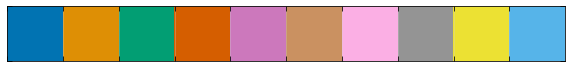

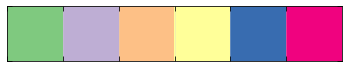

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

import matplotlib as mpl
import scipy as sp
#from lmfit                import Model
from scipy.optimize       import curve_fit
from scipy.stats          import chi2
import pandas as pd

import sys
sys.path.append('/home/apizzuto/Nova/scripts/')
from Novae import Nova
from sensitivity_fit_functions import *

%matplotlib inline

plt.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')
sns.palplot(sns.color_palette('colorblind'))
palette = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f']
sns.palplot(palette)

In [5]:
df = pd.read_csv('/home/apizzuto/Nova/Novae_details.csv')
df = df.sort_values('Start Time (gamma ray)')

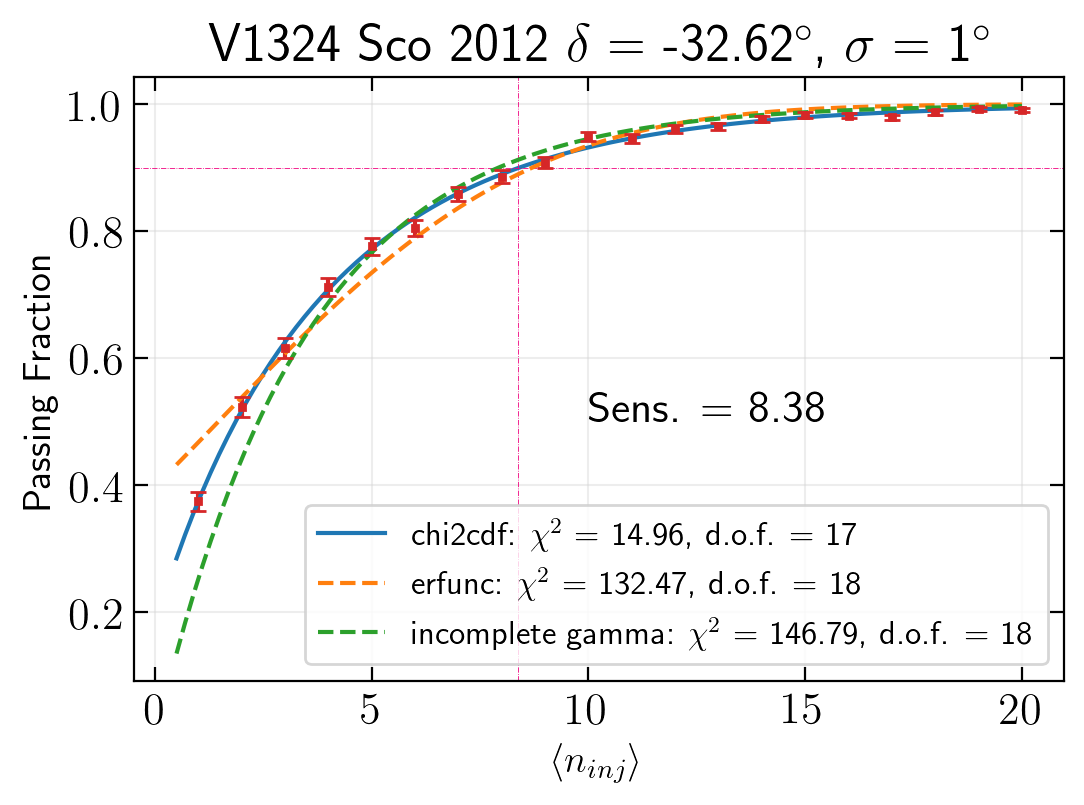

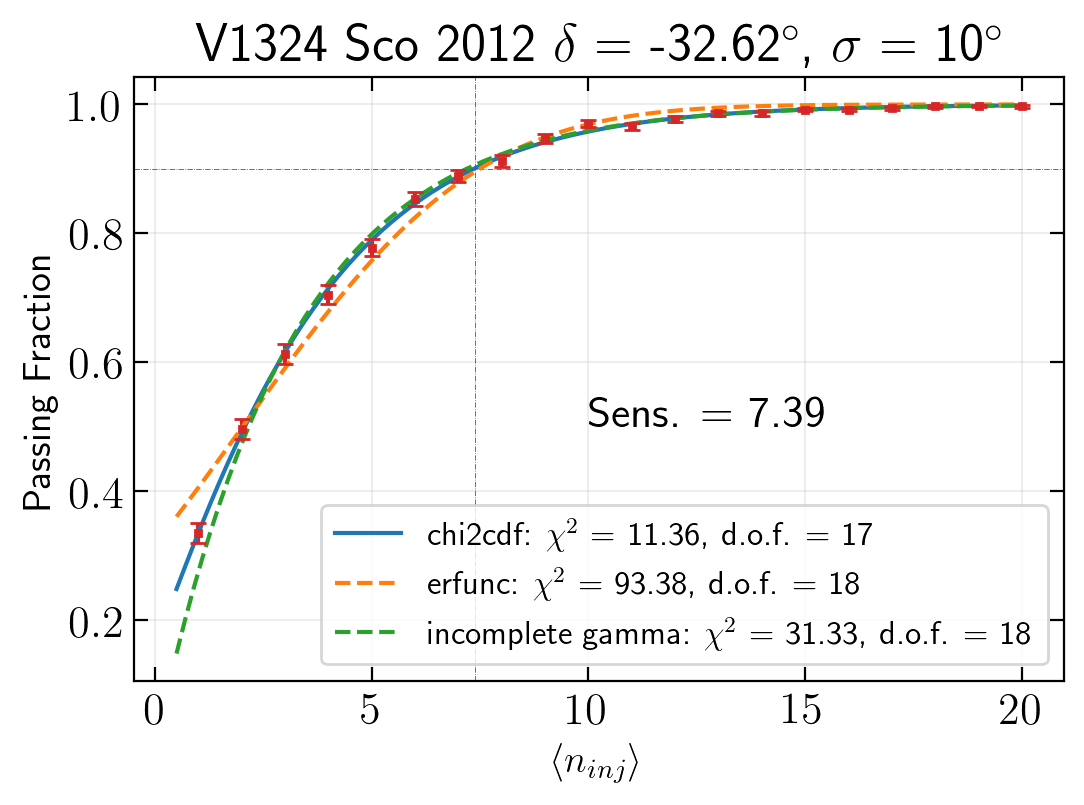

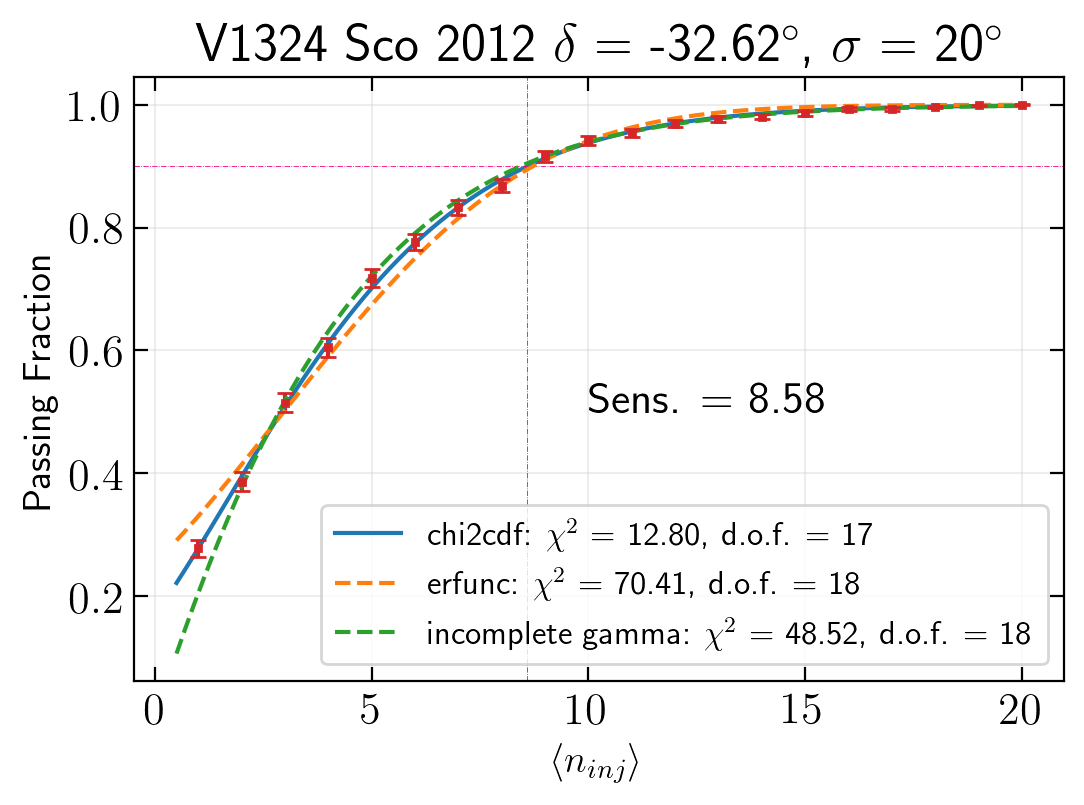

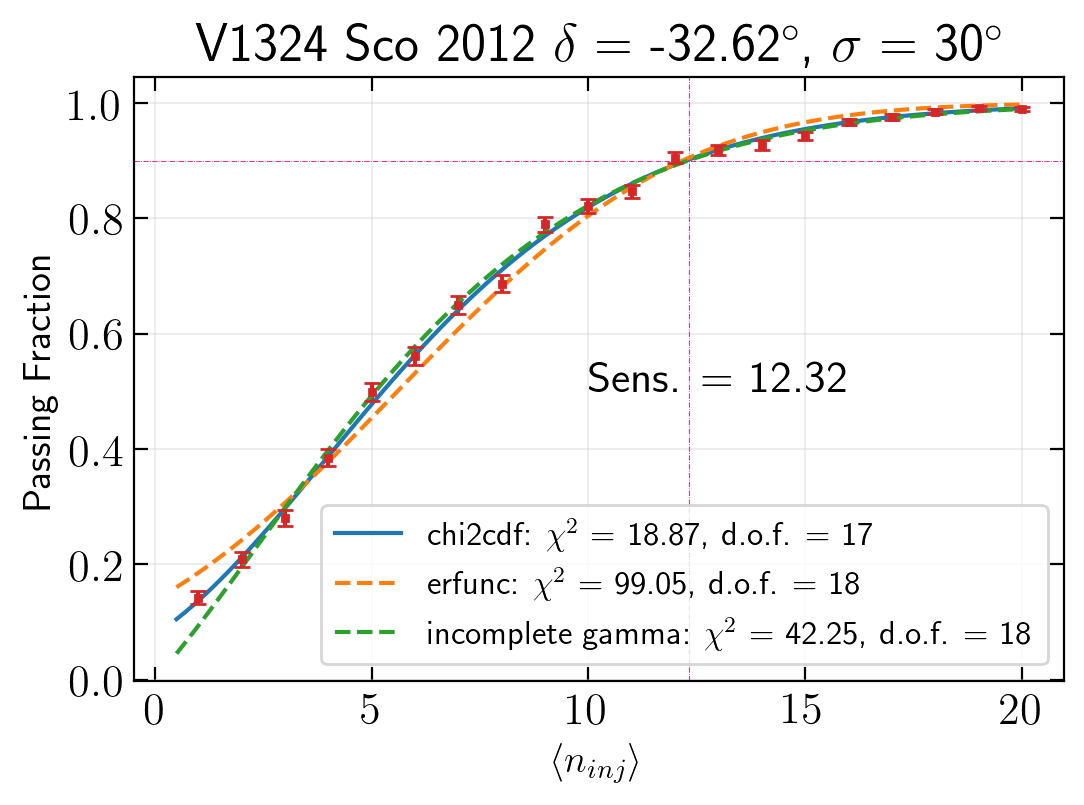

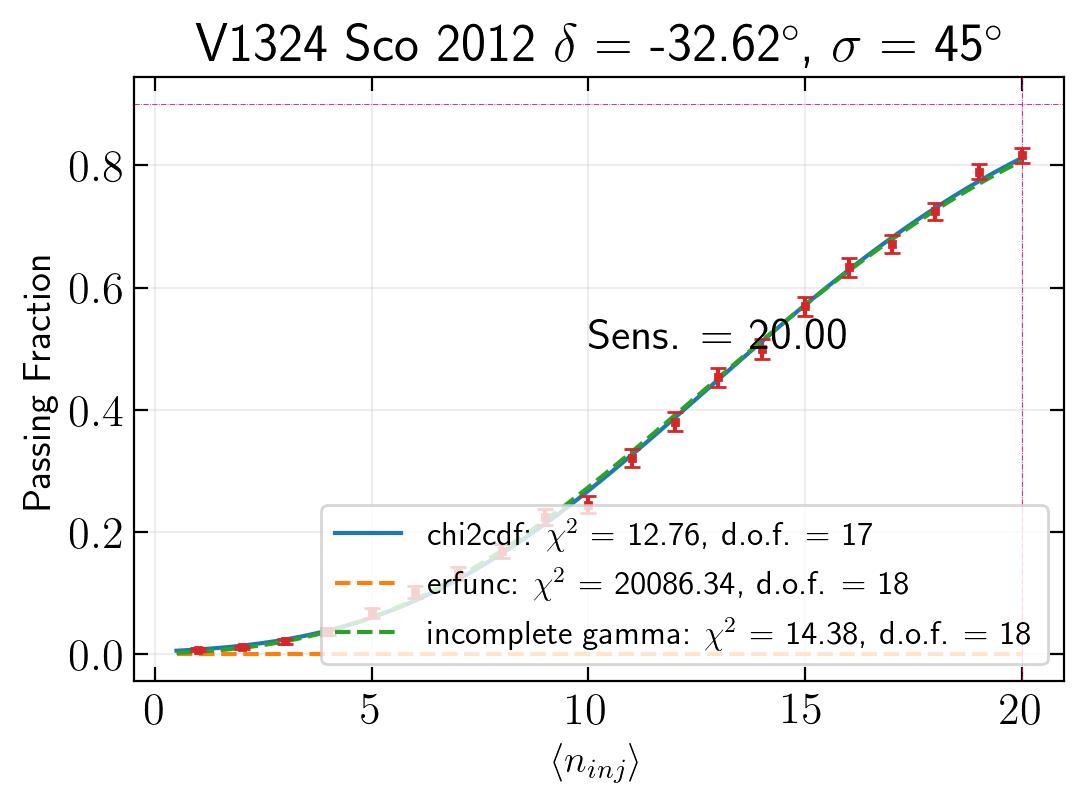

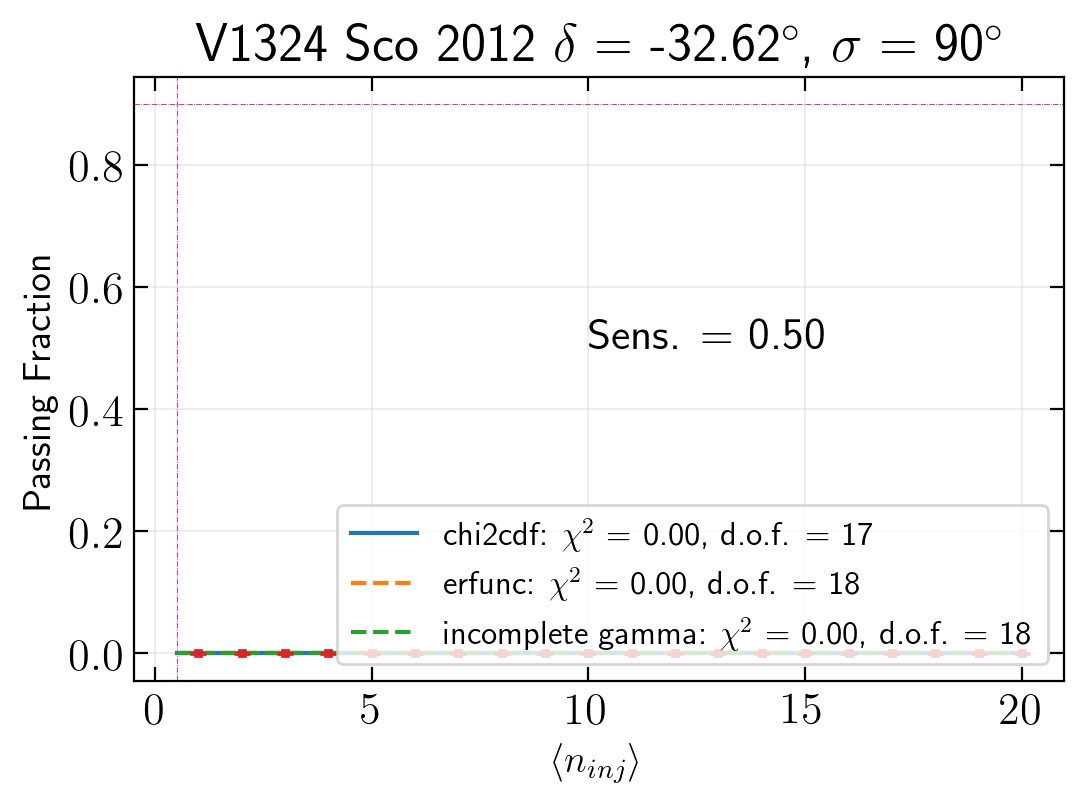

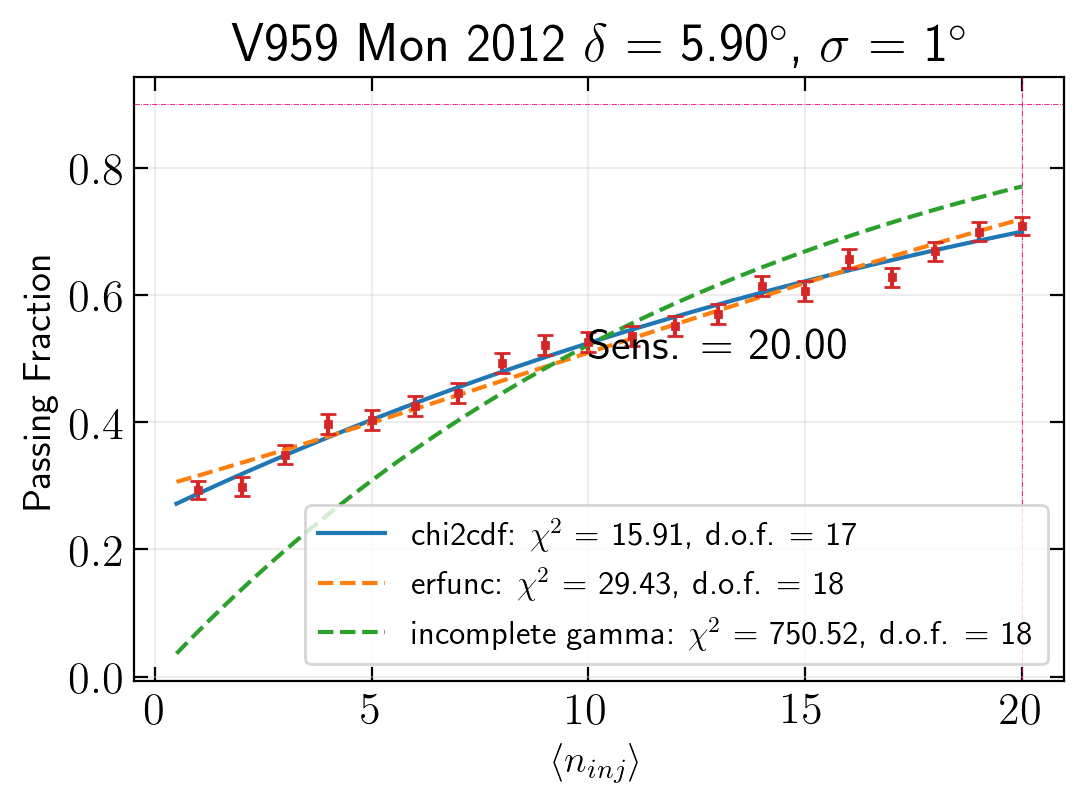

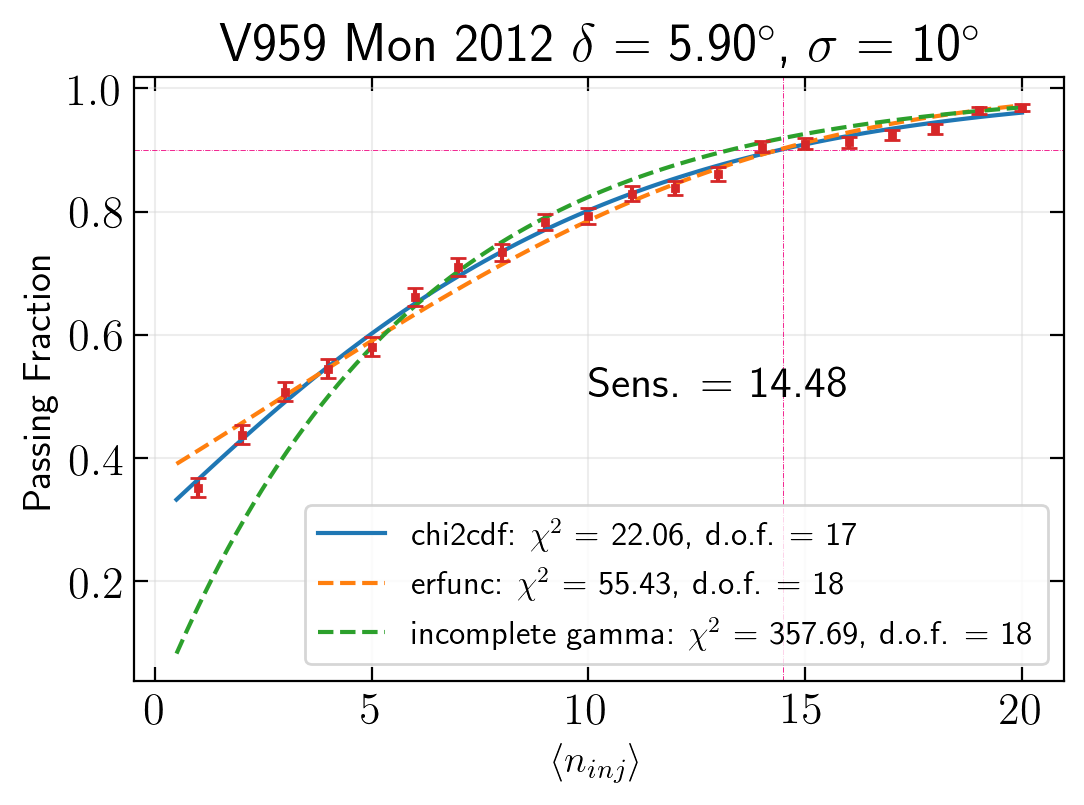

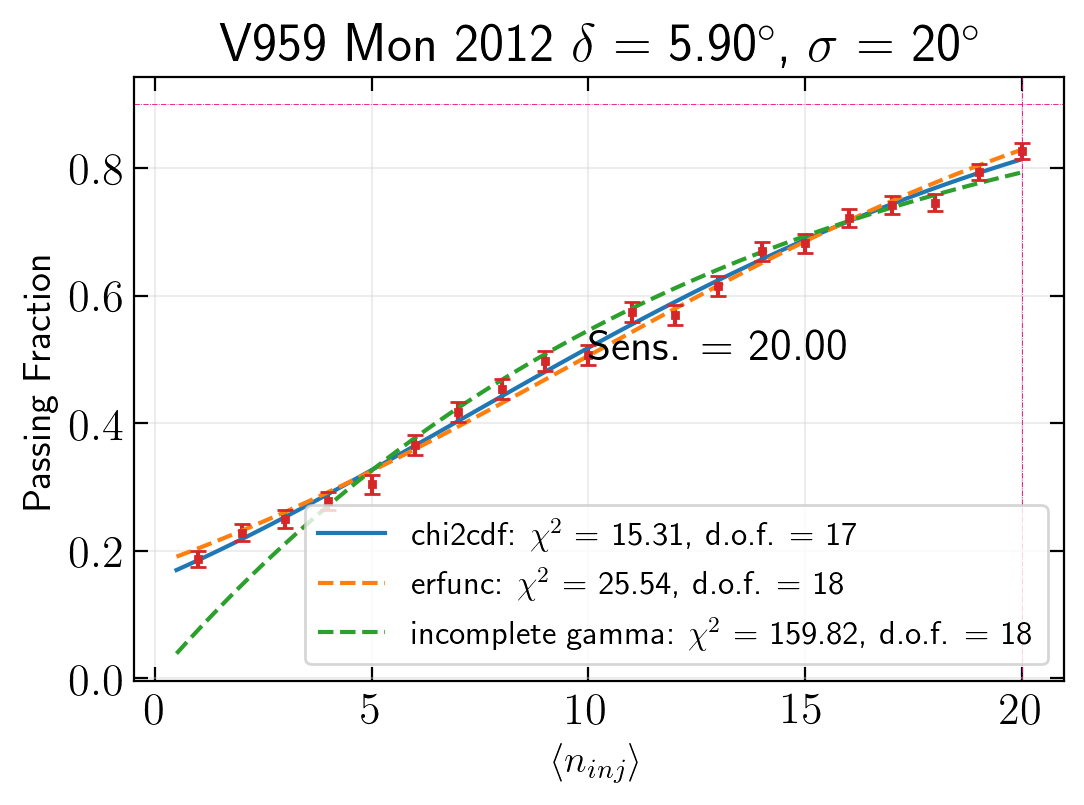

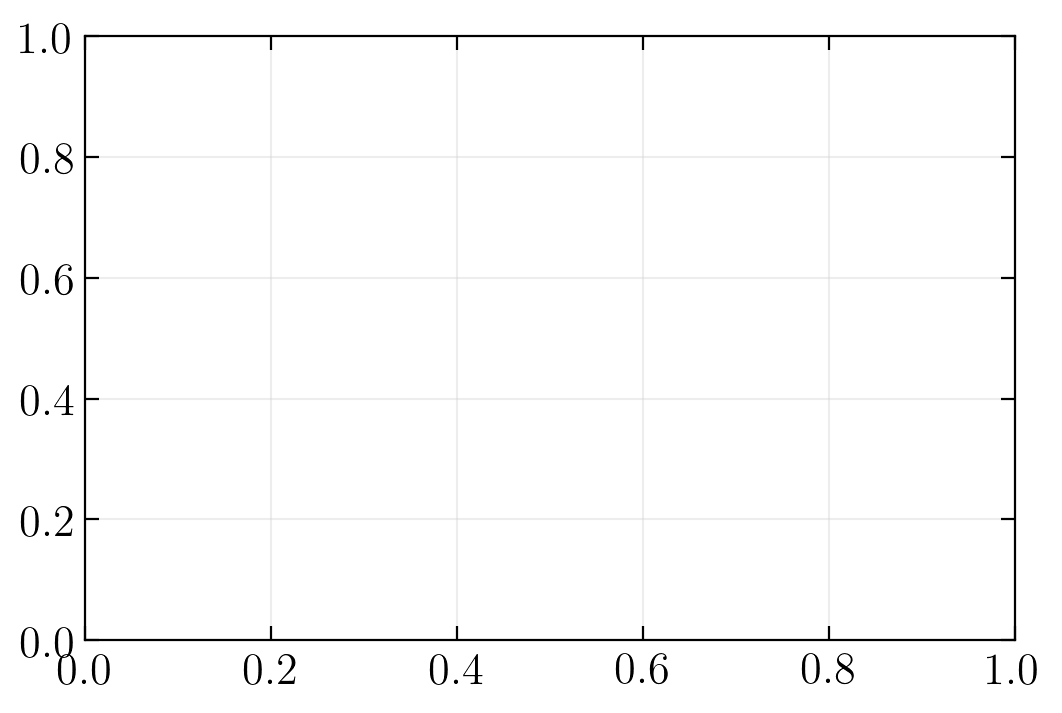

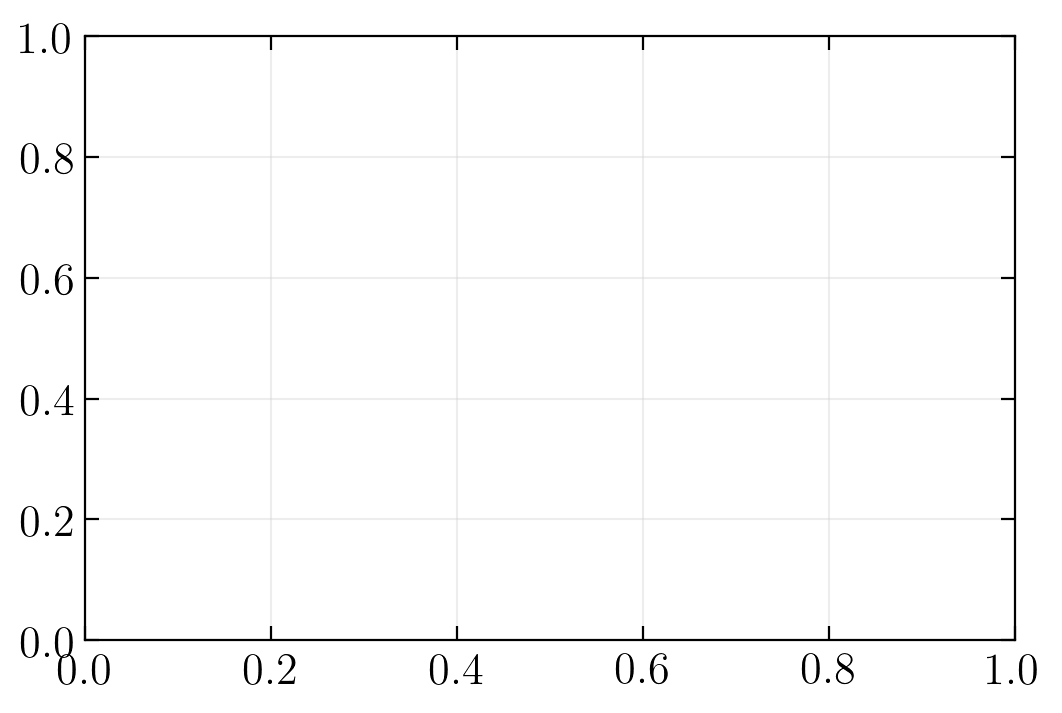

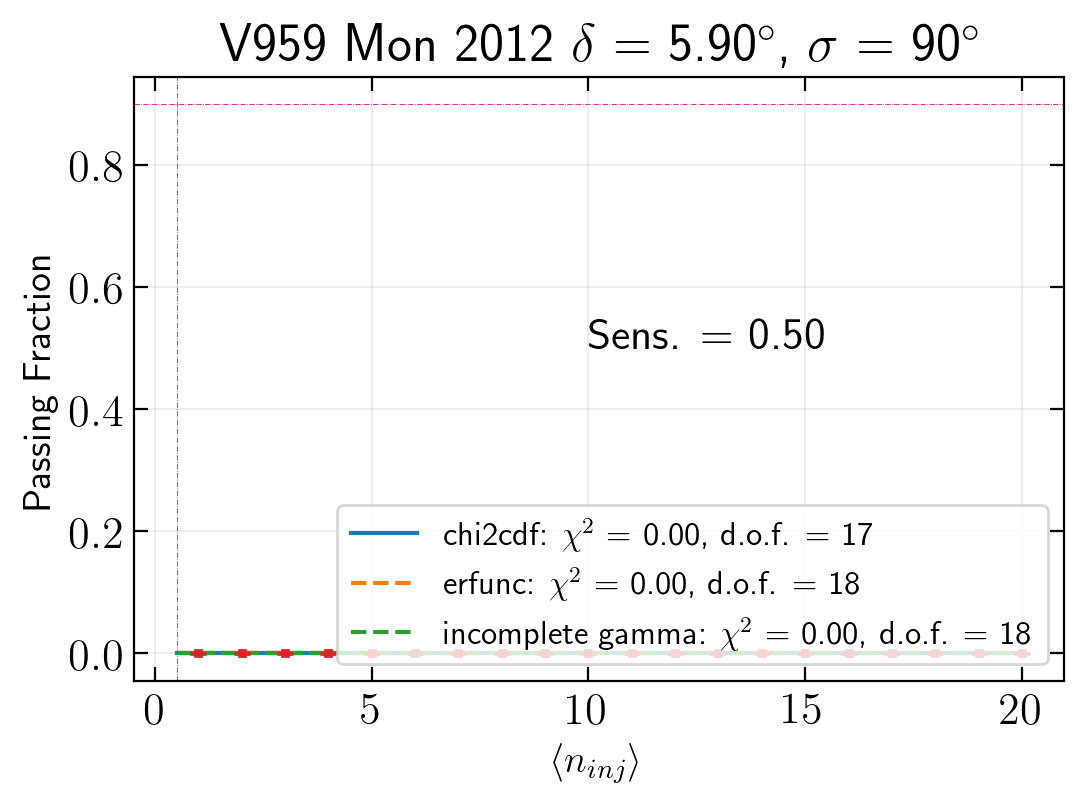

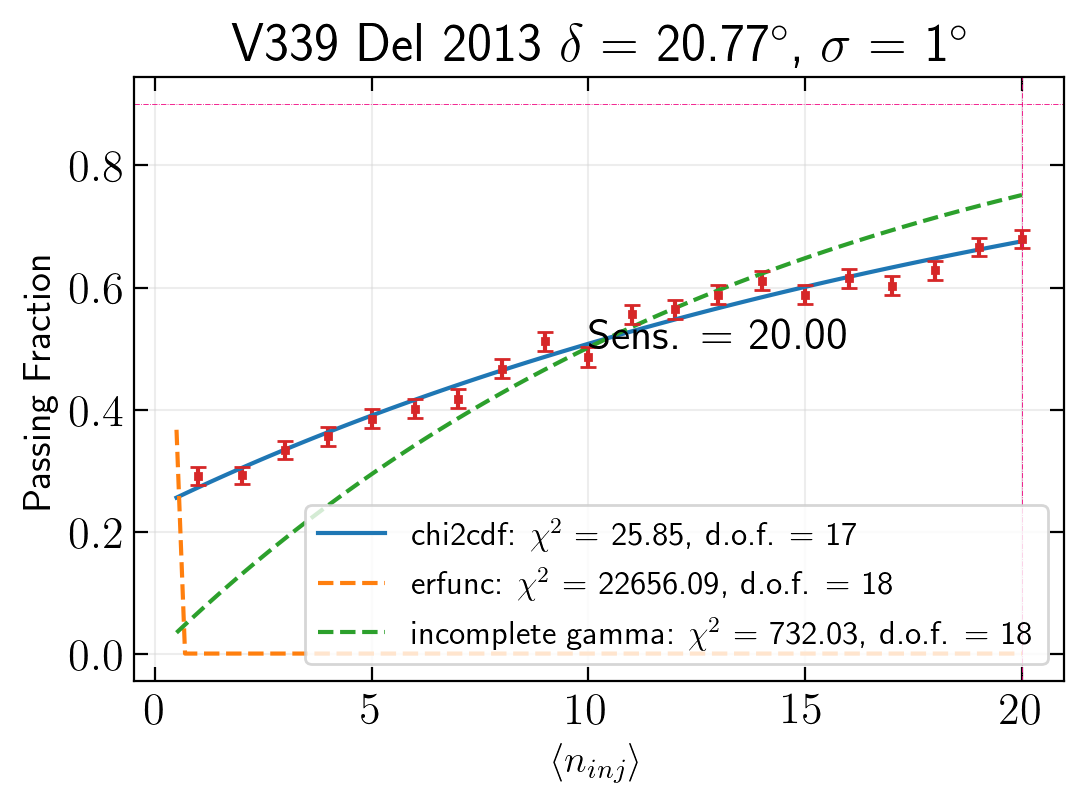

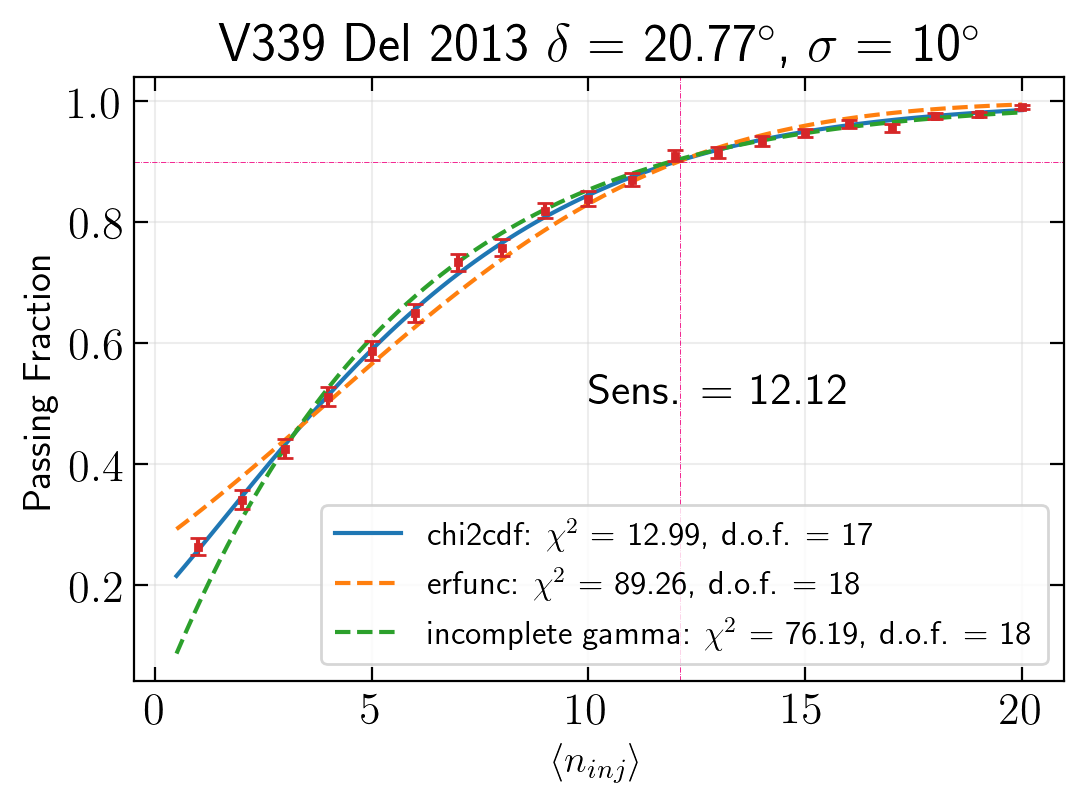

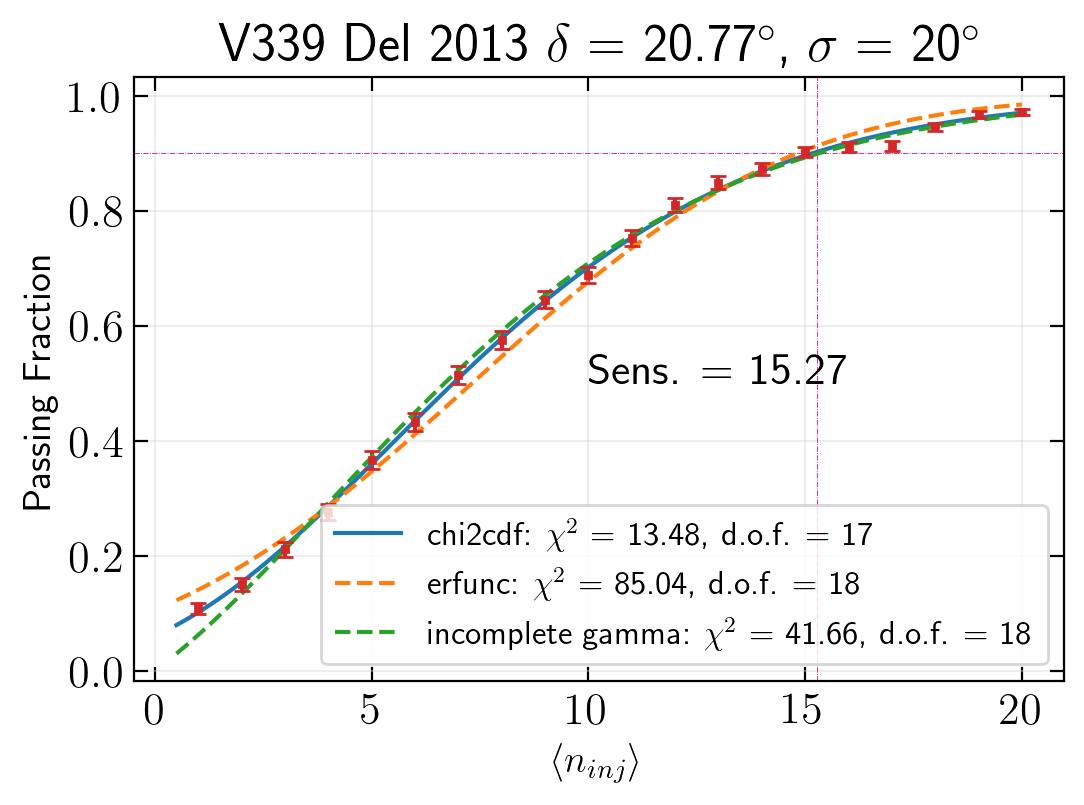

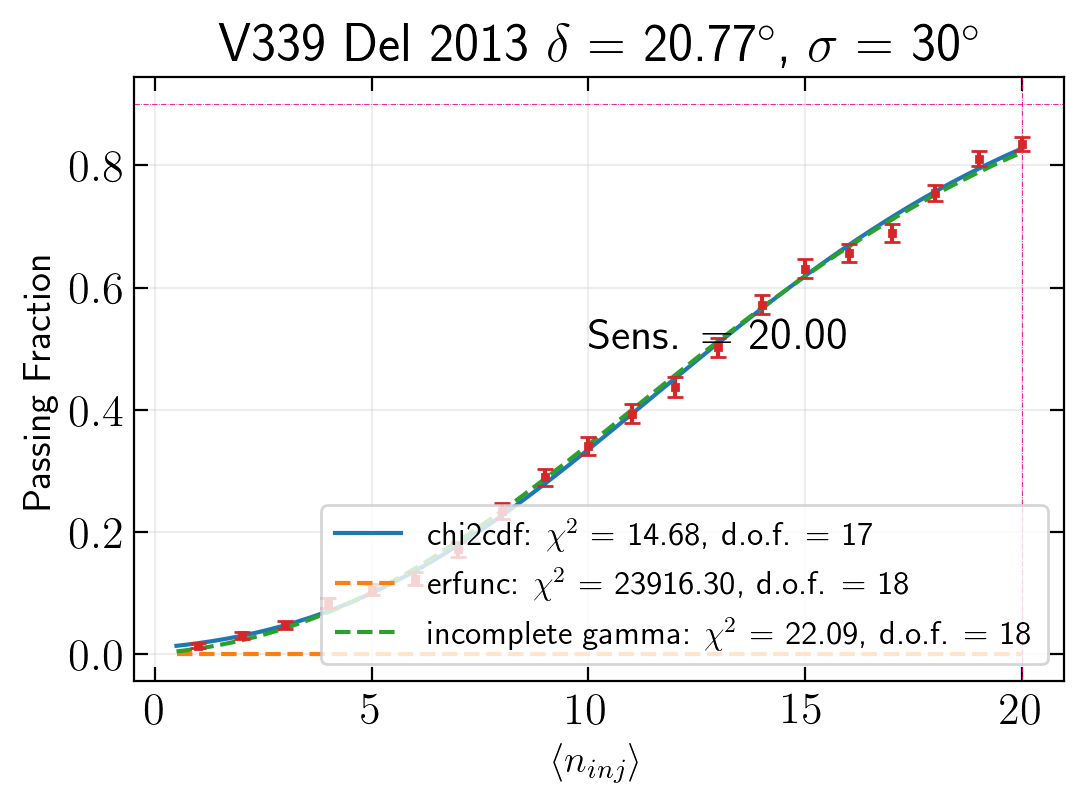

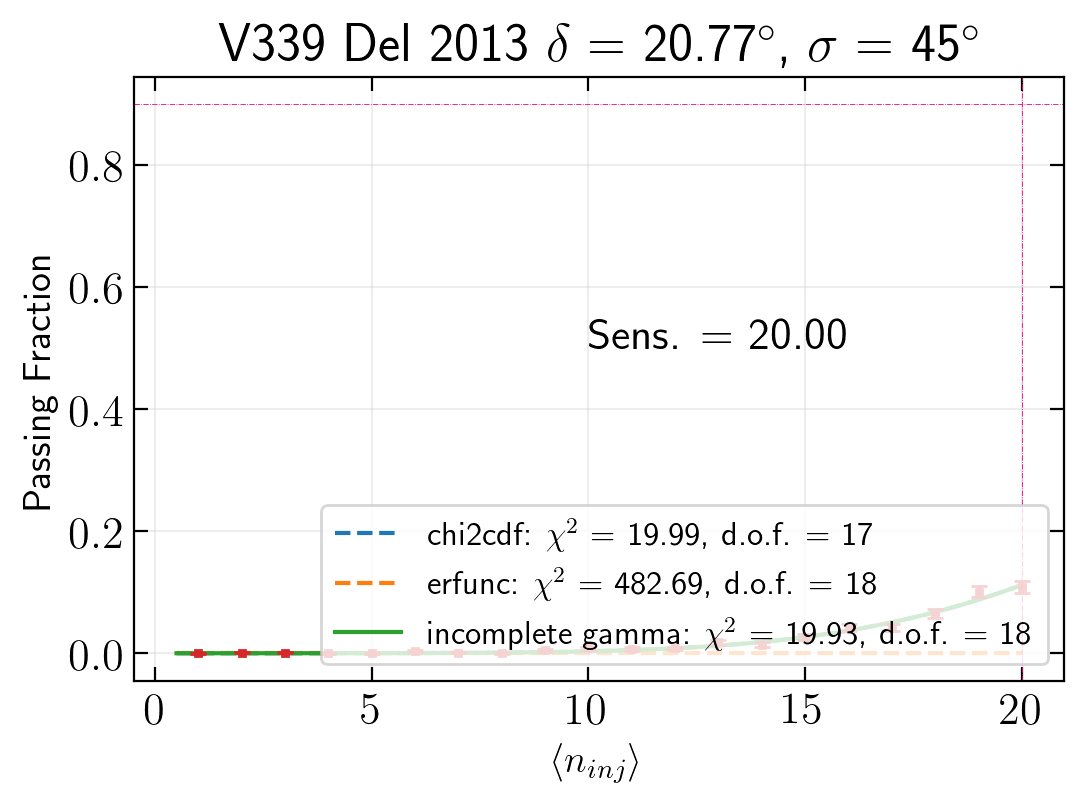

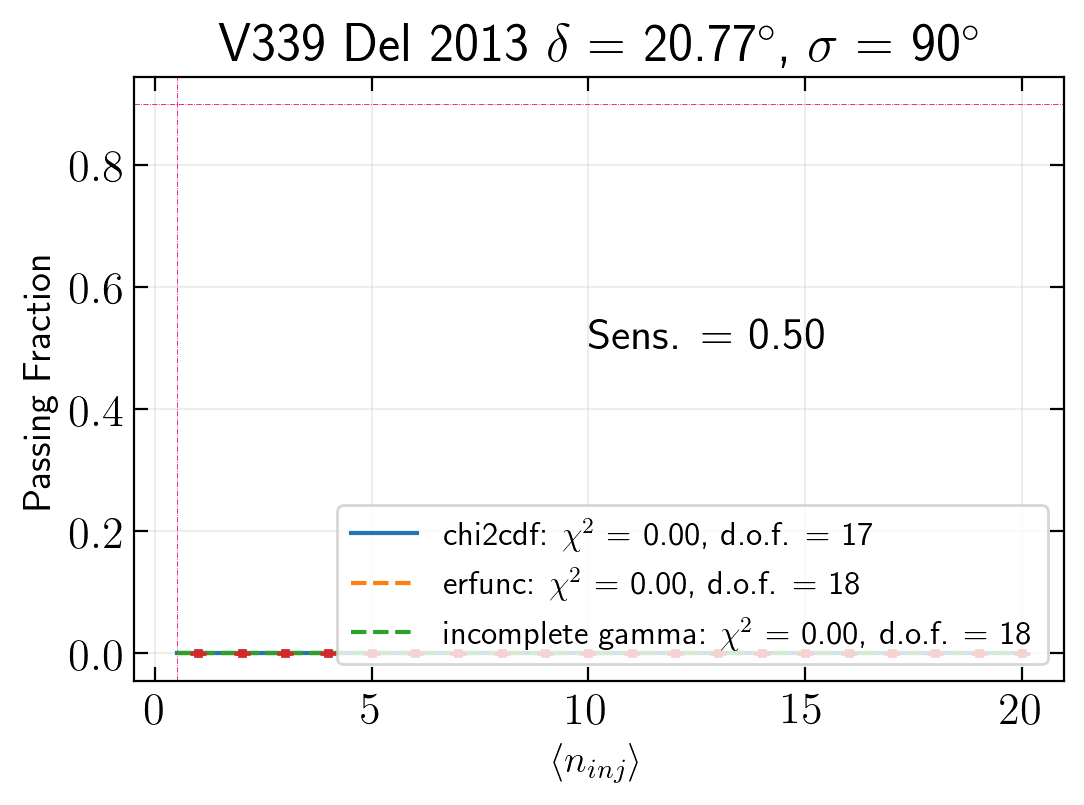

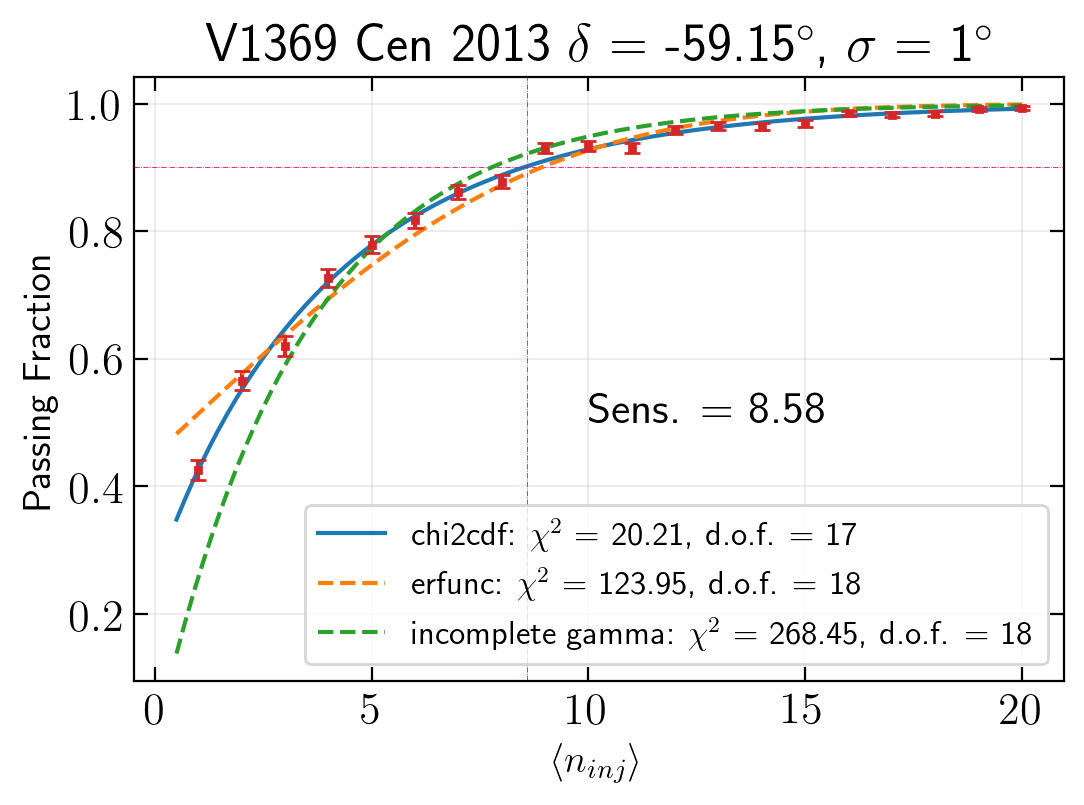

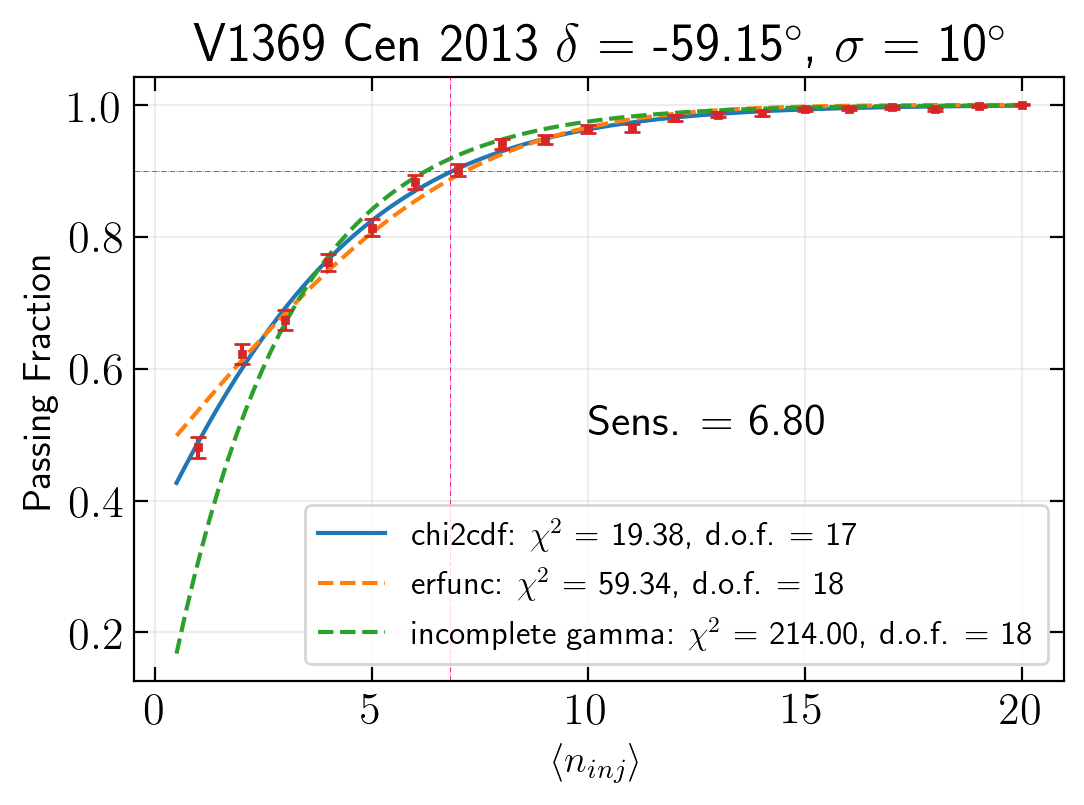

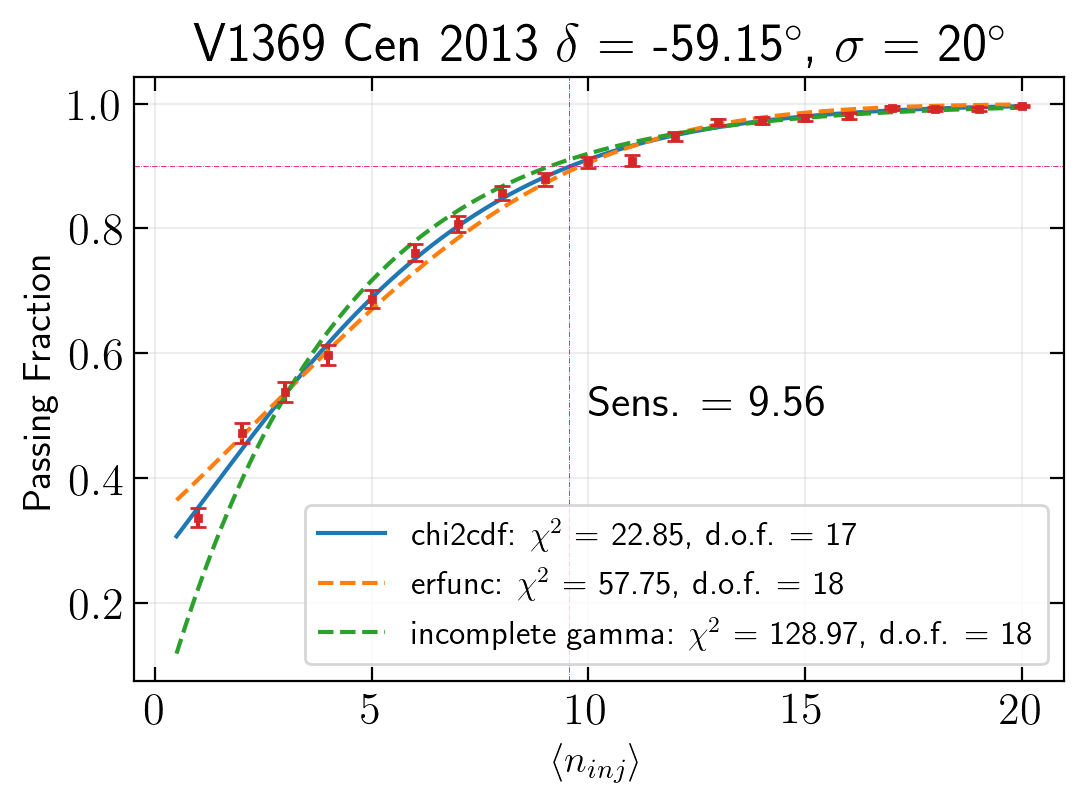

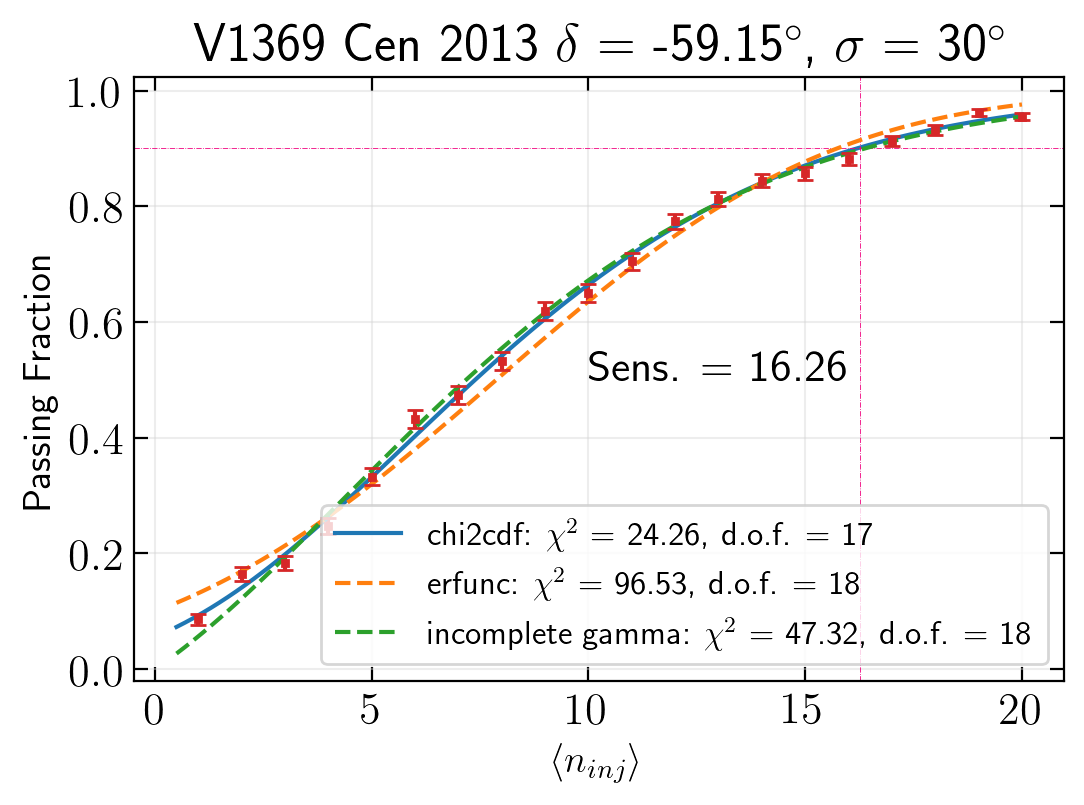

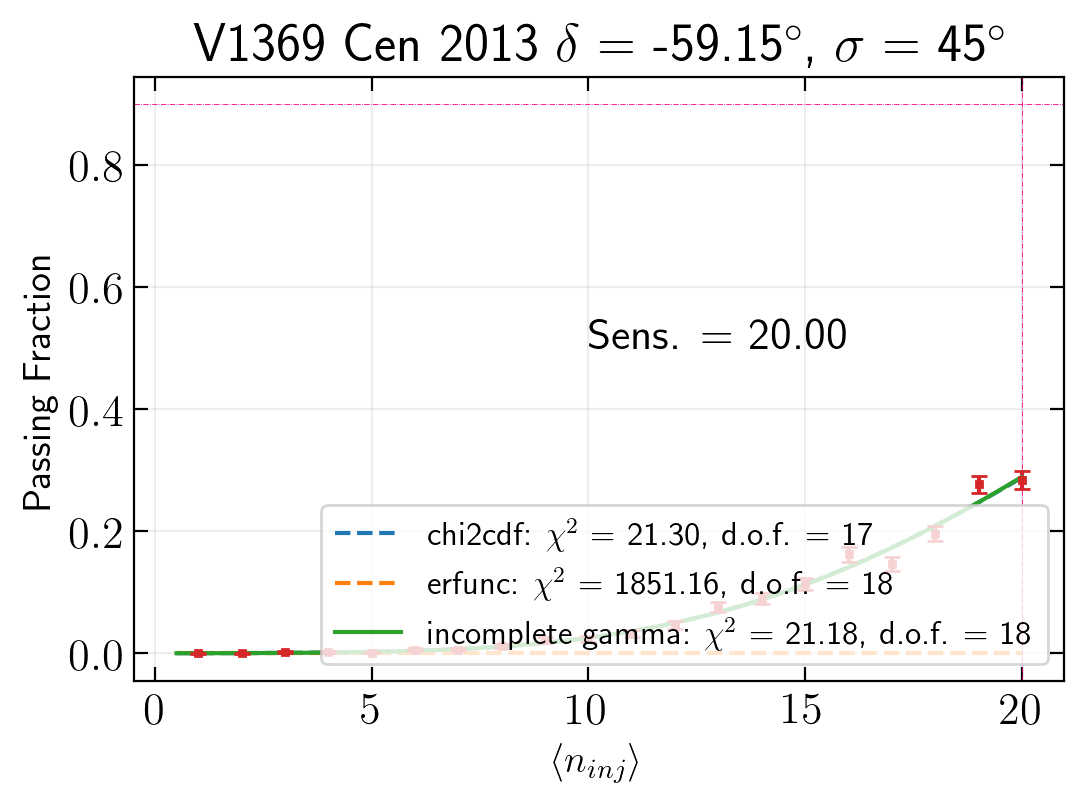

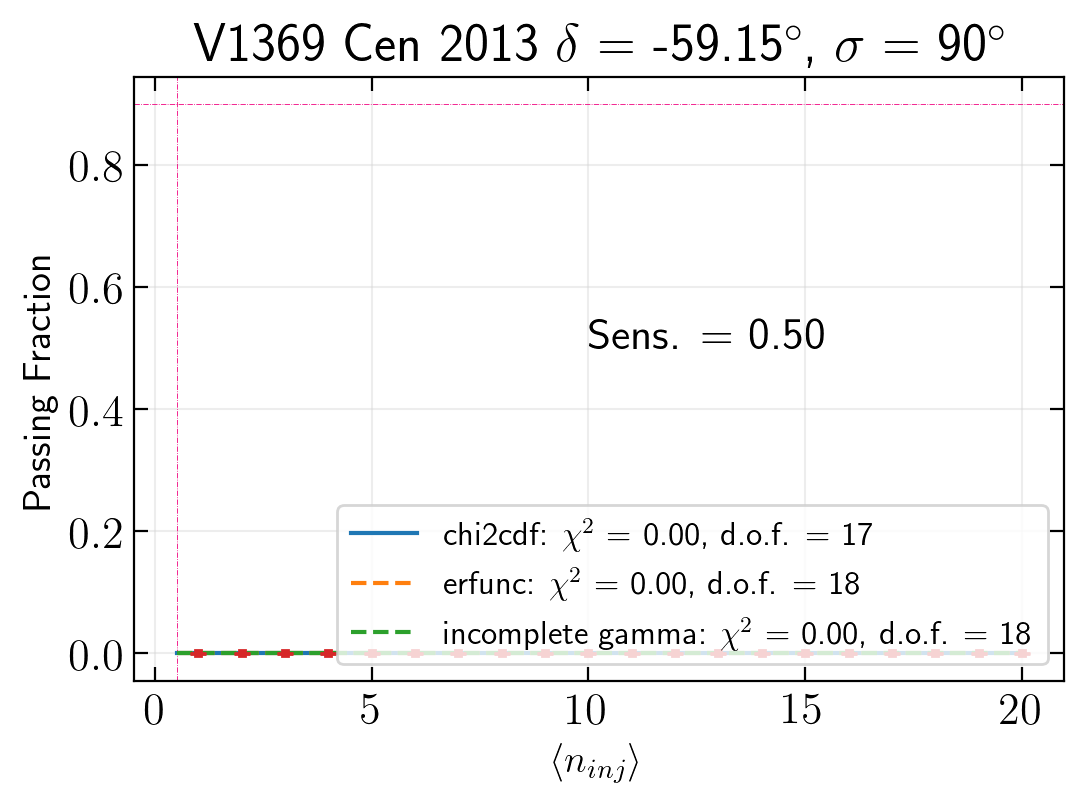

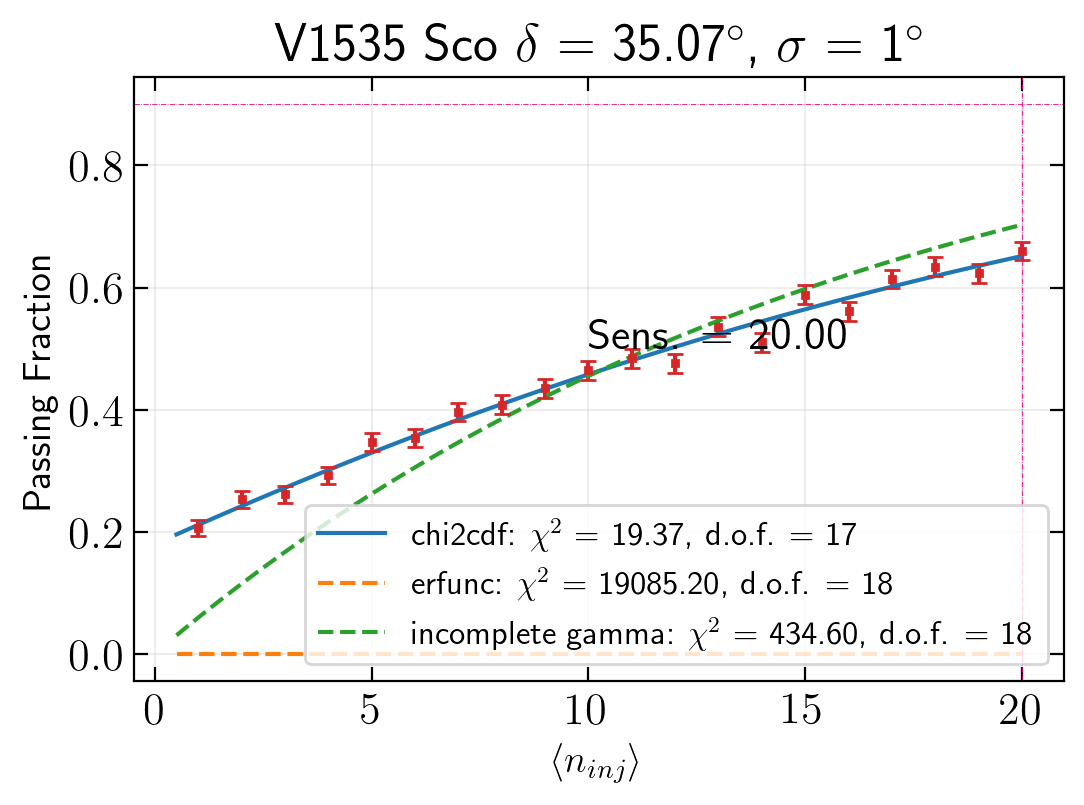

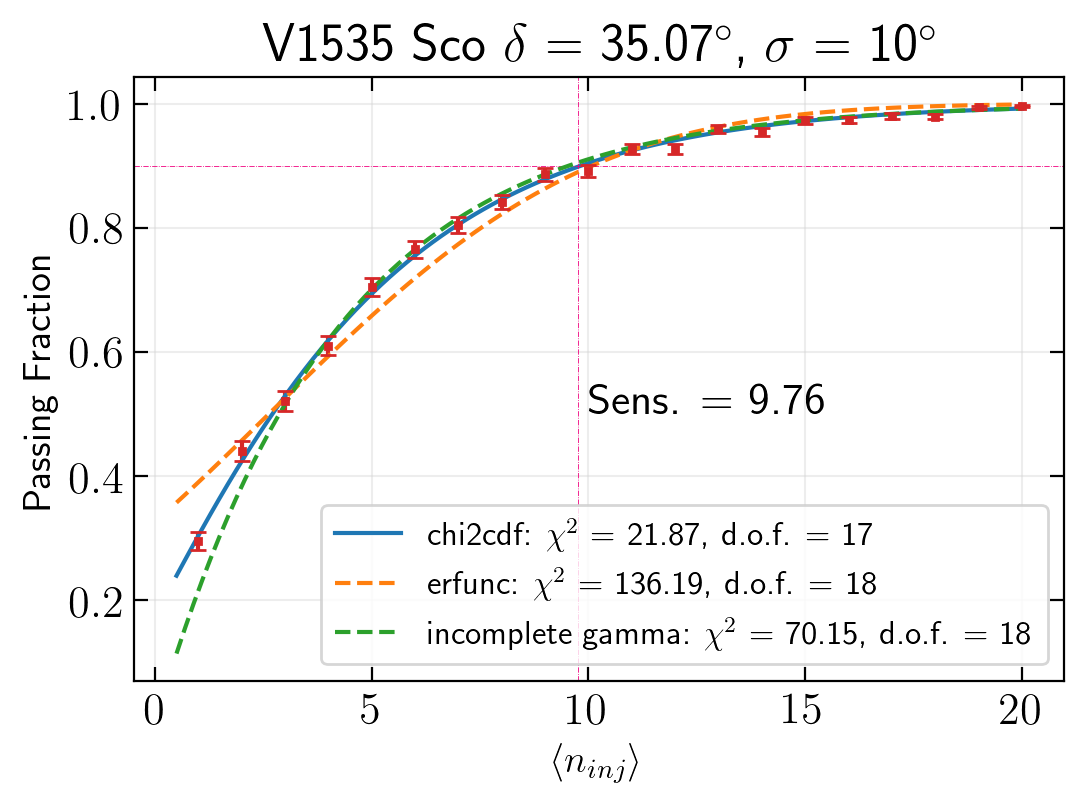

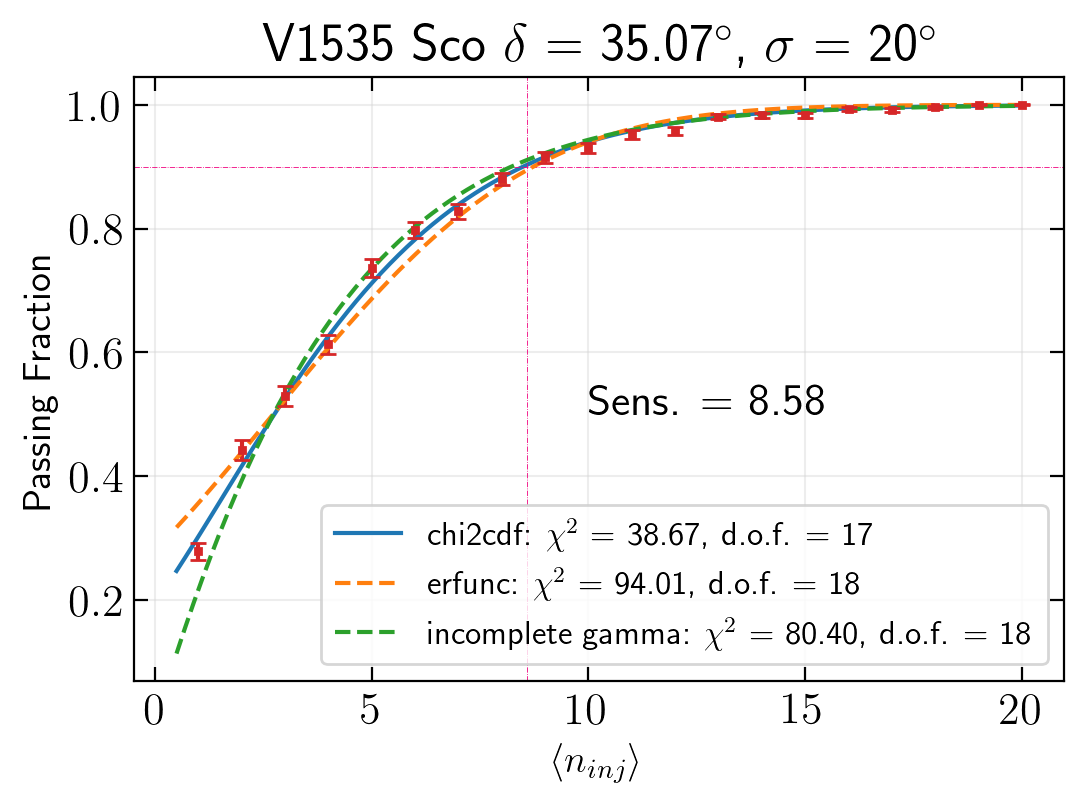

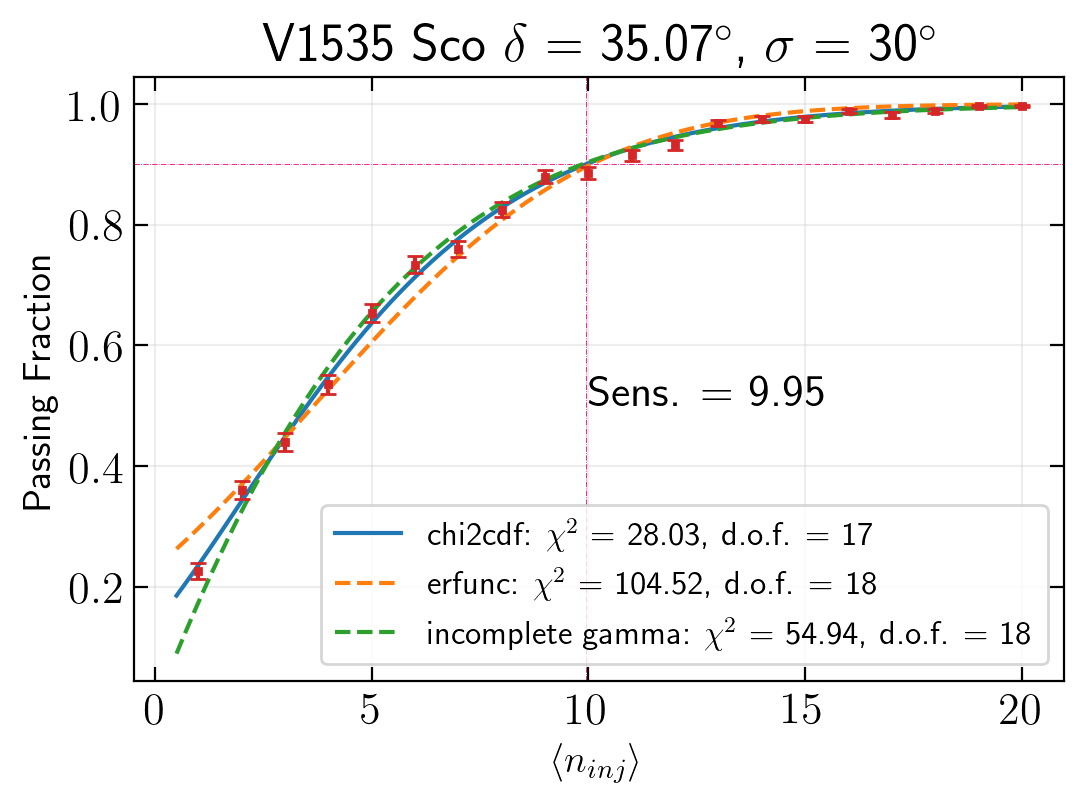

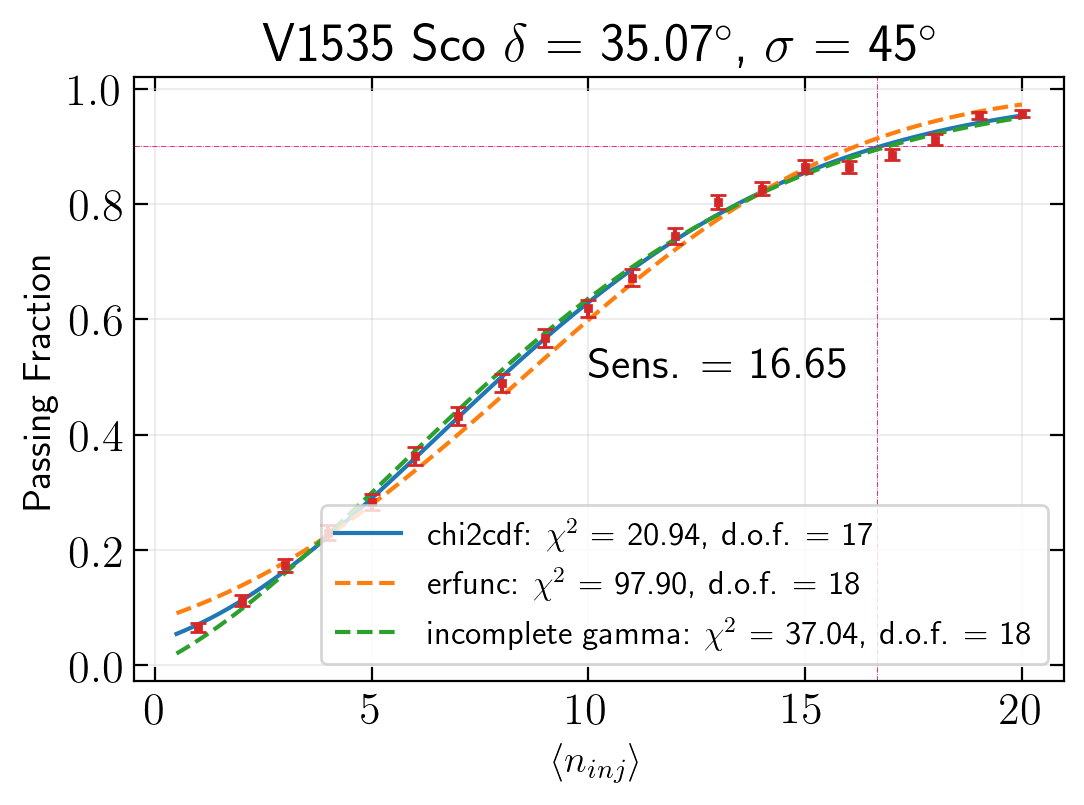

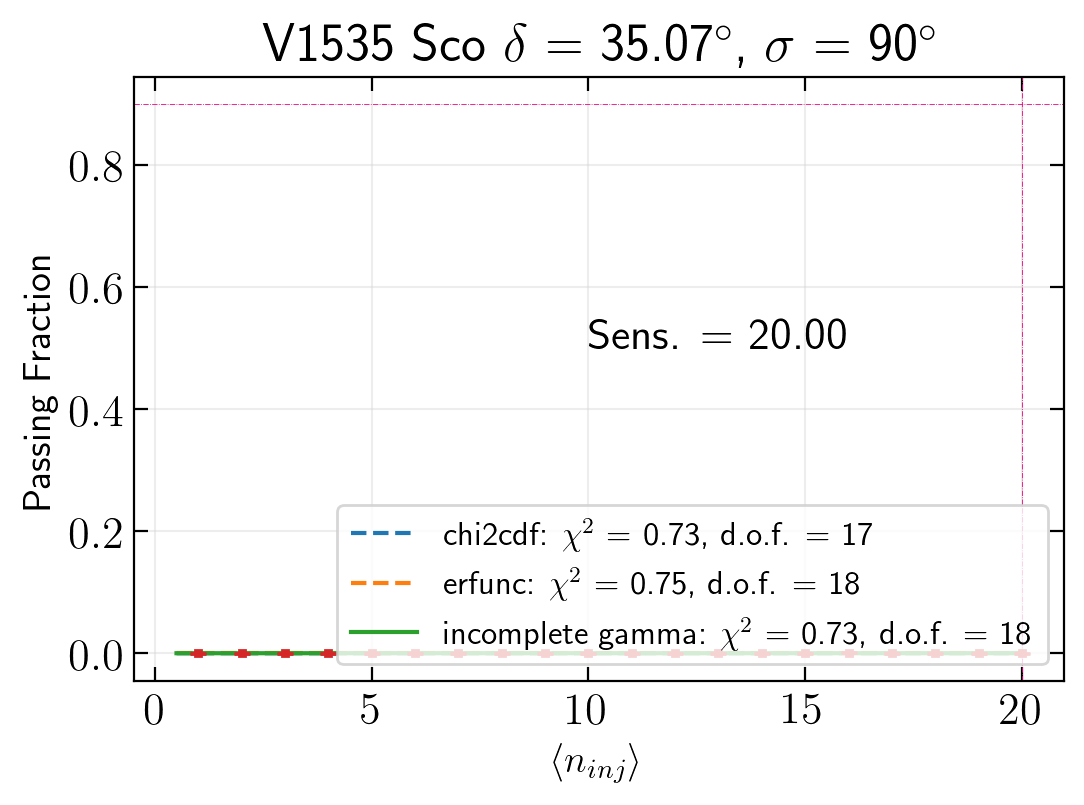

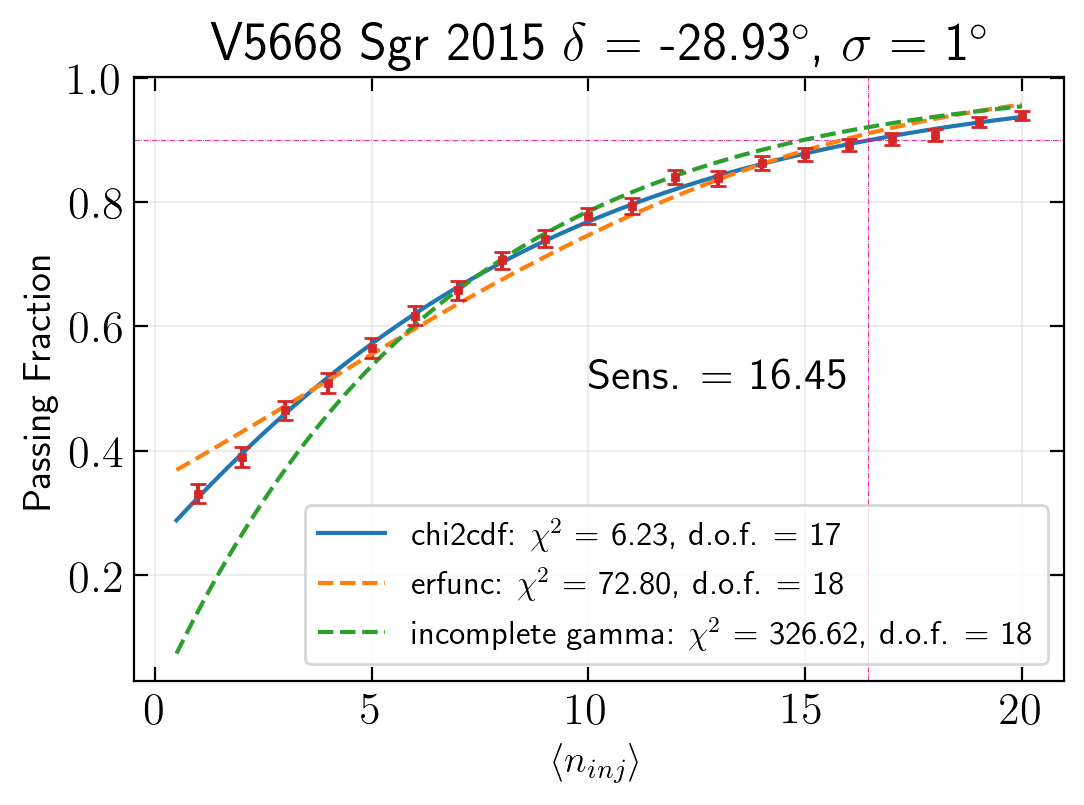

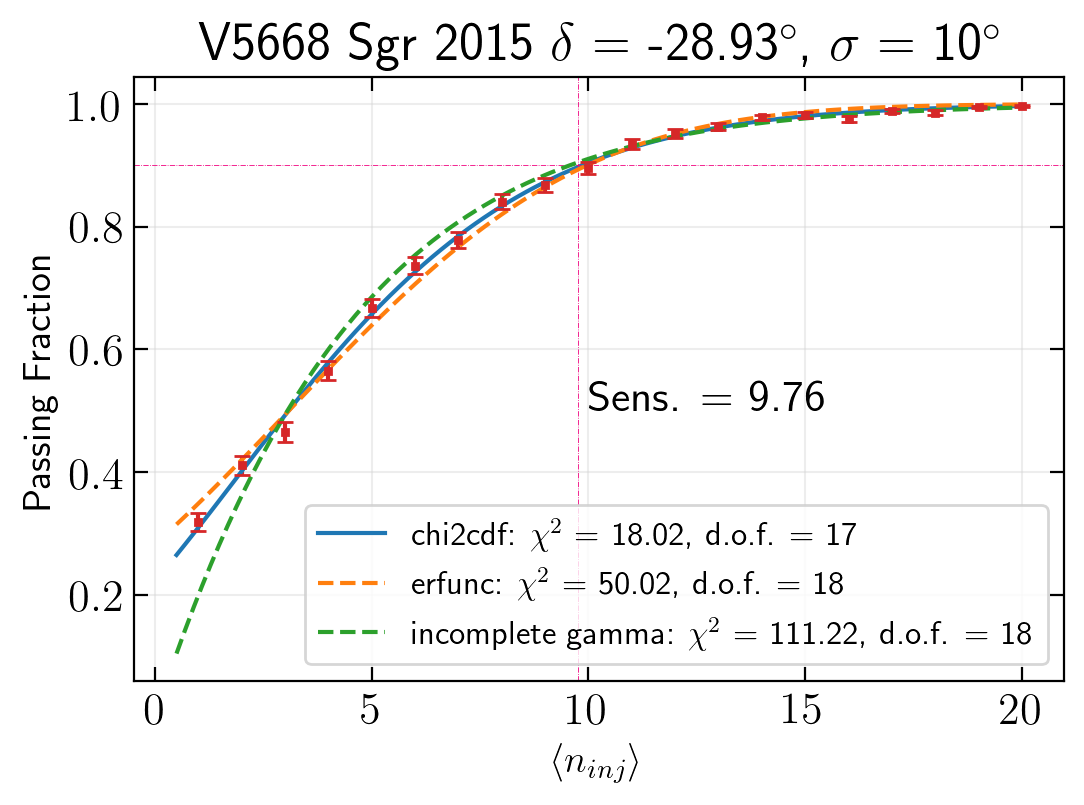

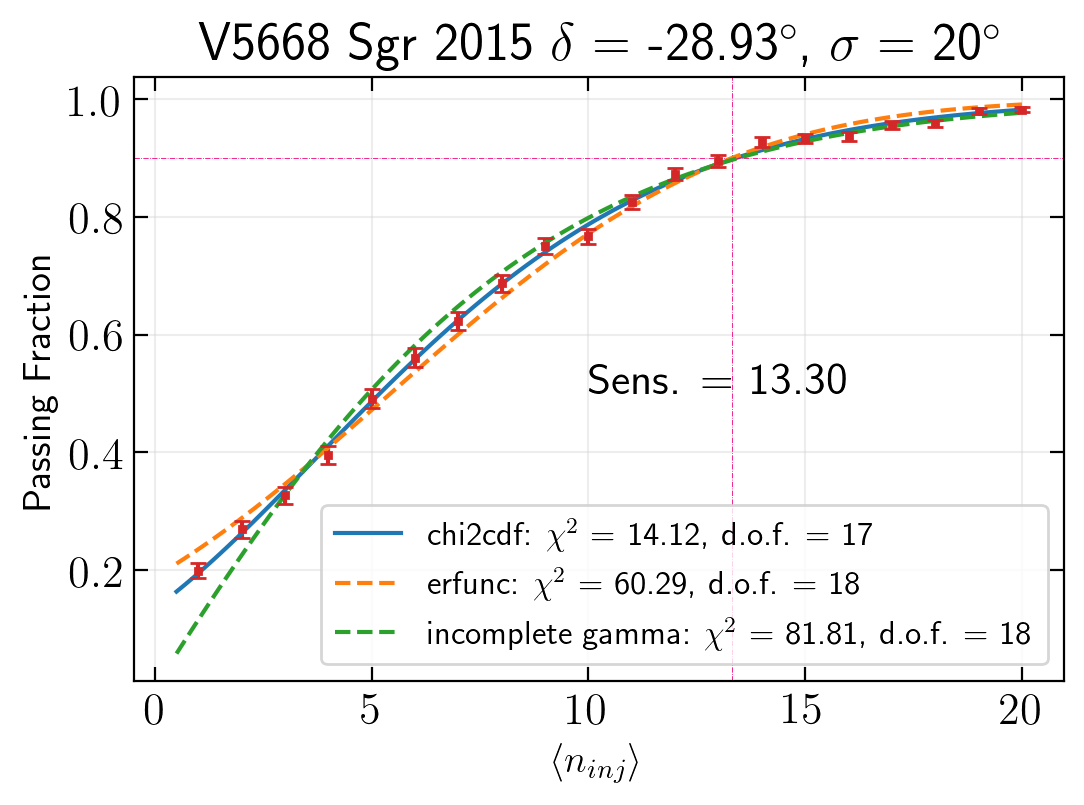

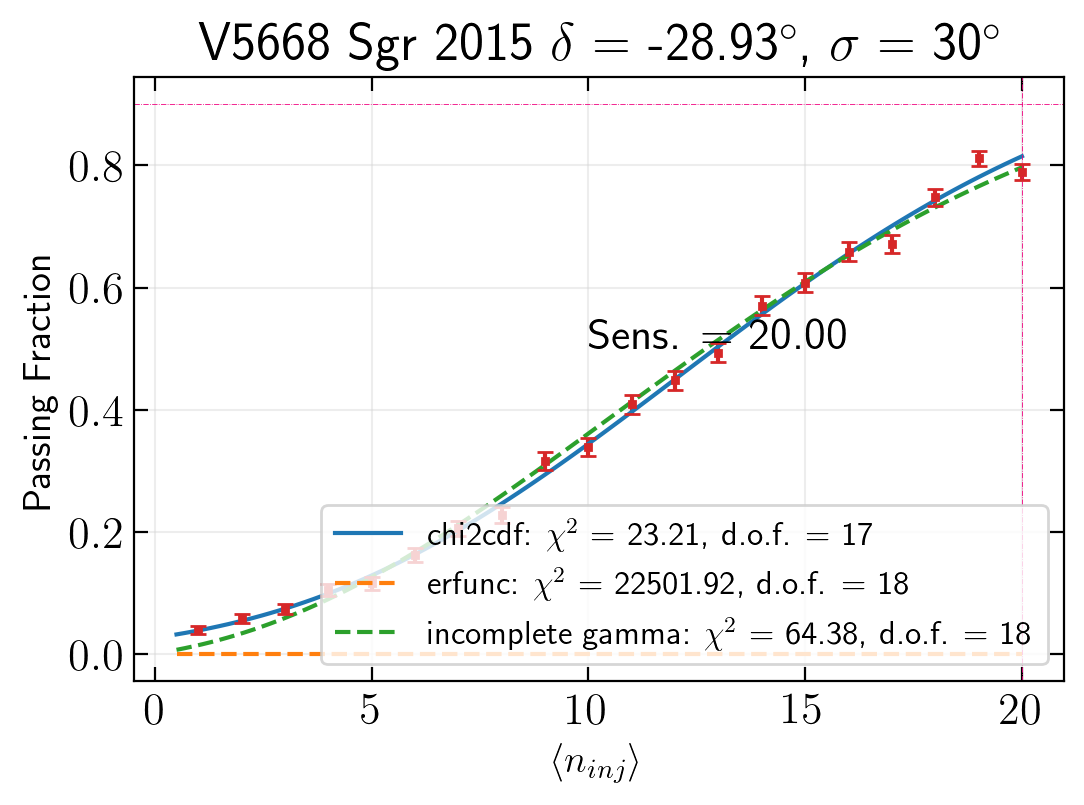

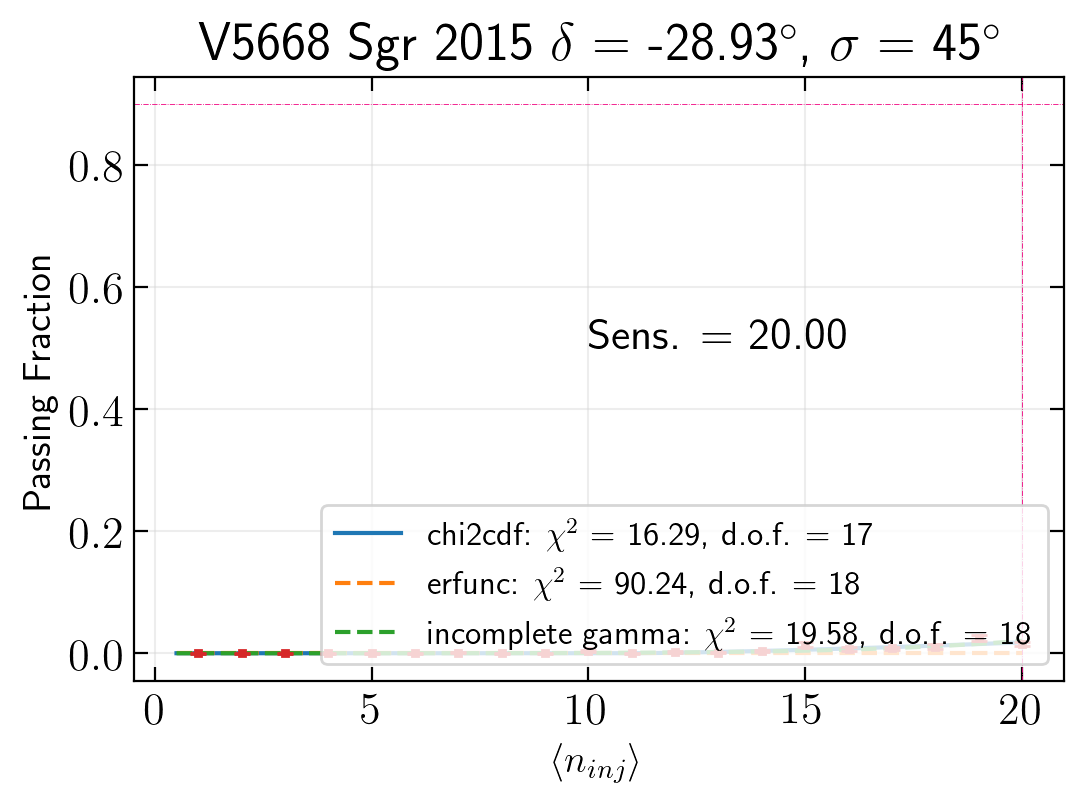

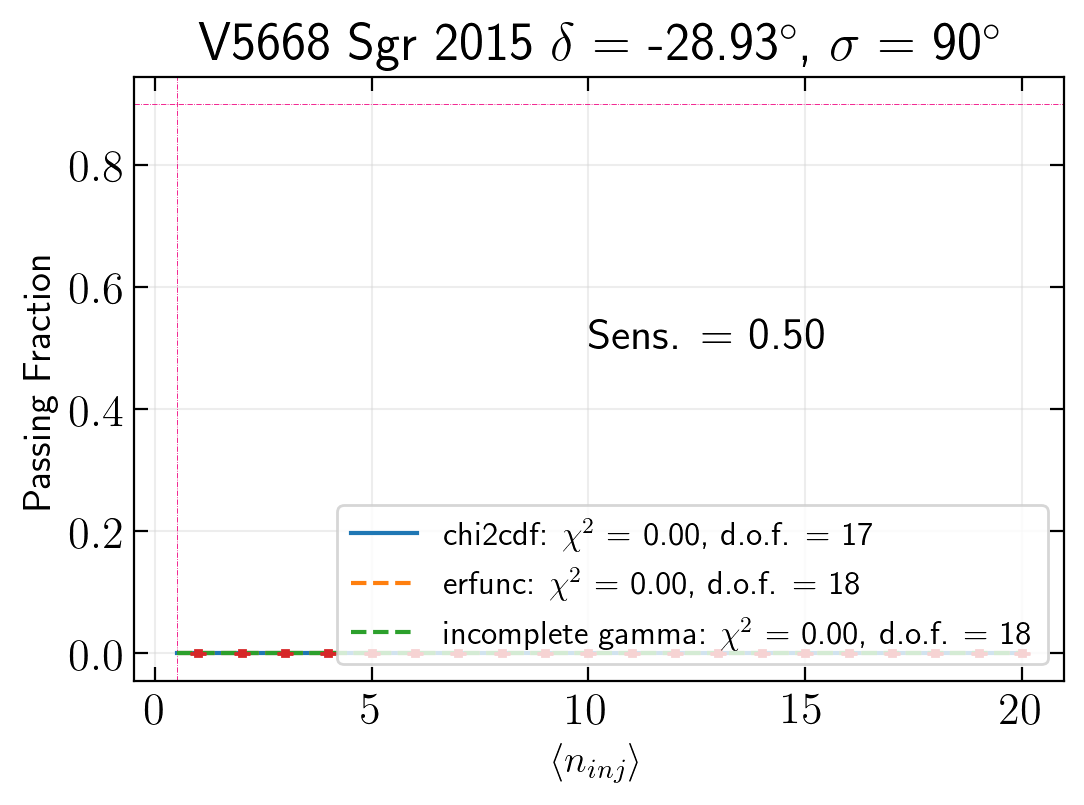

In [10]:
for iii in [1,2,3,4,5,6][:]:
    novnam = df.iloc[iii]['Name']
    novdec = df.iloc[iii]['Dec. (Deg)']
    for sigma in ['1', '10', '20', '30', '45', '90'][:]:
        fig, ax = plt.subplots(figsize = (6,4), dpi=200)
        try:
            sensitivity_curve(iii, spectra='SPL', sigma=sigma, trim=-1, fontsize = 12, ax = ax)
        except:
            plt.show()
            continue
        ax.set_xlabel(r'$\langle n_{inj} \rangle$', fontsize = 14)
        ax.set_ylabel(r'Passing Fraction', fontsize = 14)
        ax.set_title(r'{} '.format(novnam) + r'$\delta$ = {:.2f}'.format(novdec) + r'$^{\circ}$,' + r' $\sigma$ = {}'.format(sigma) + r'$^{\circ}$')
        plt.show()

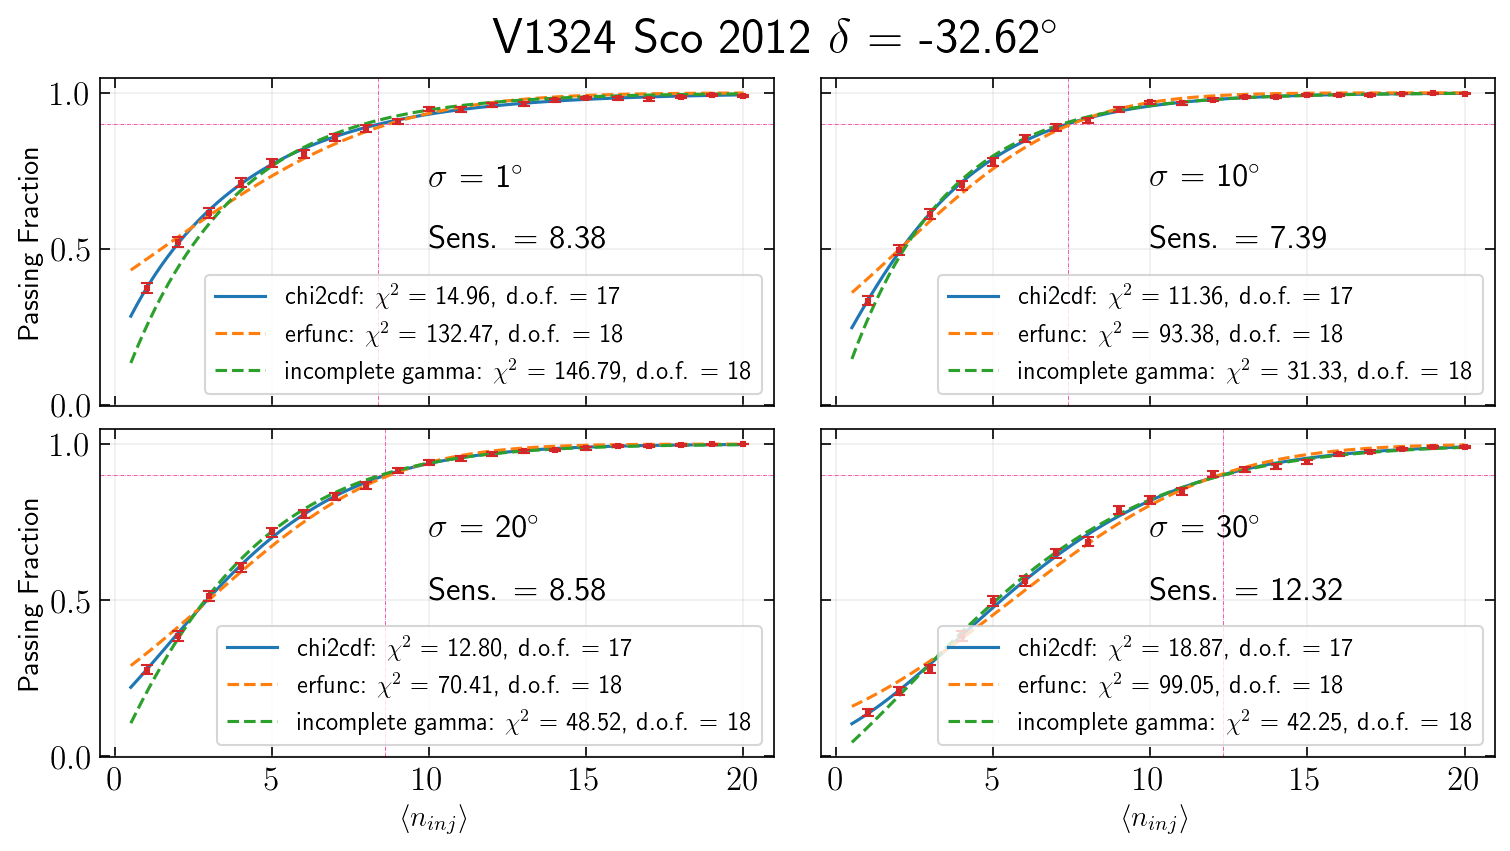

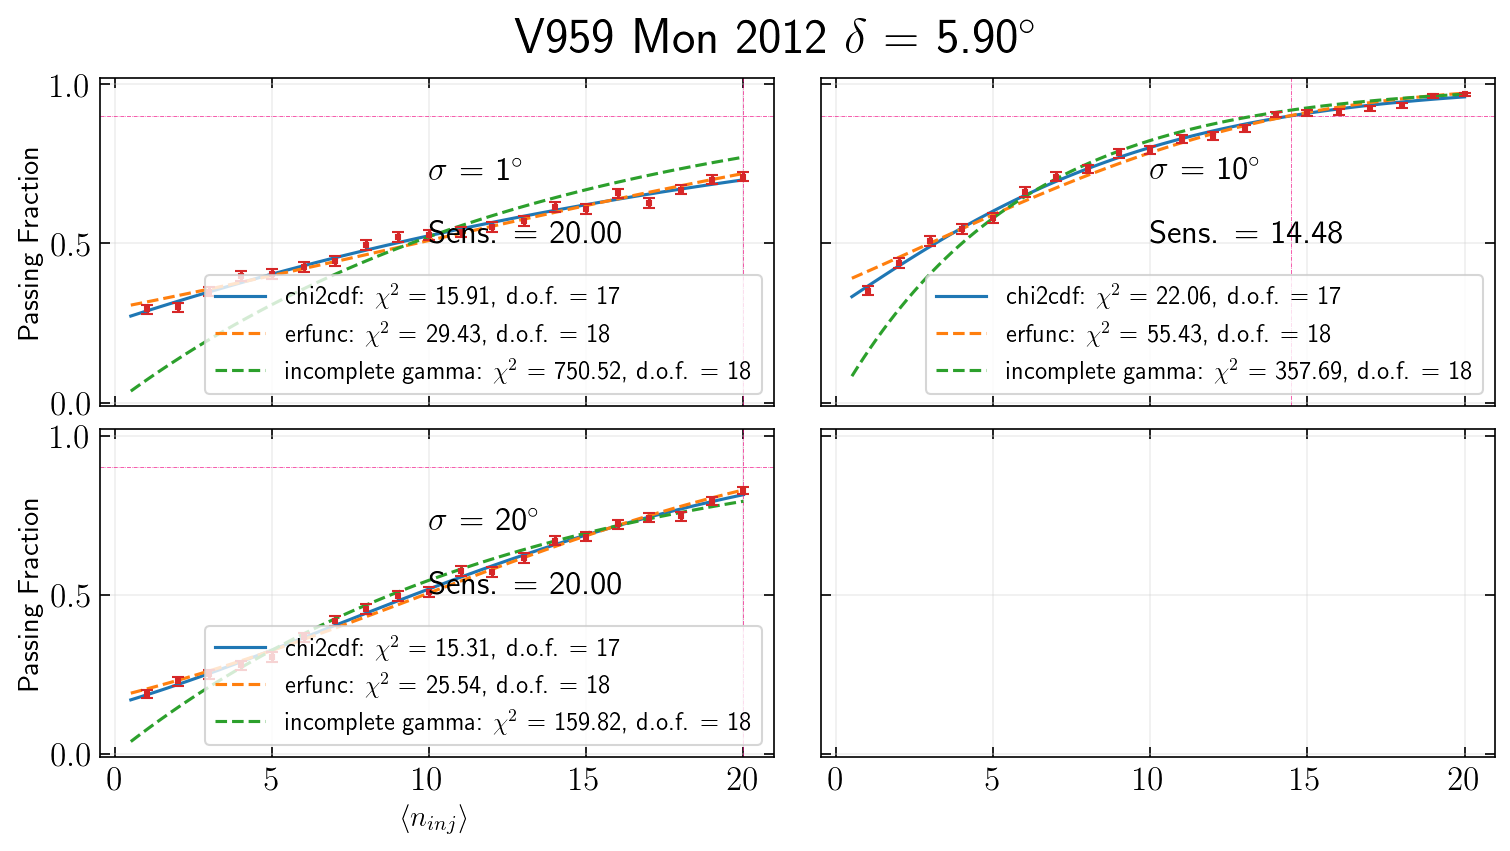

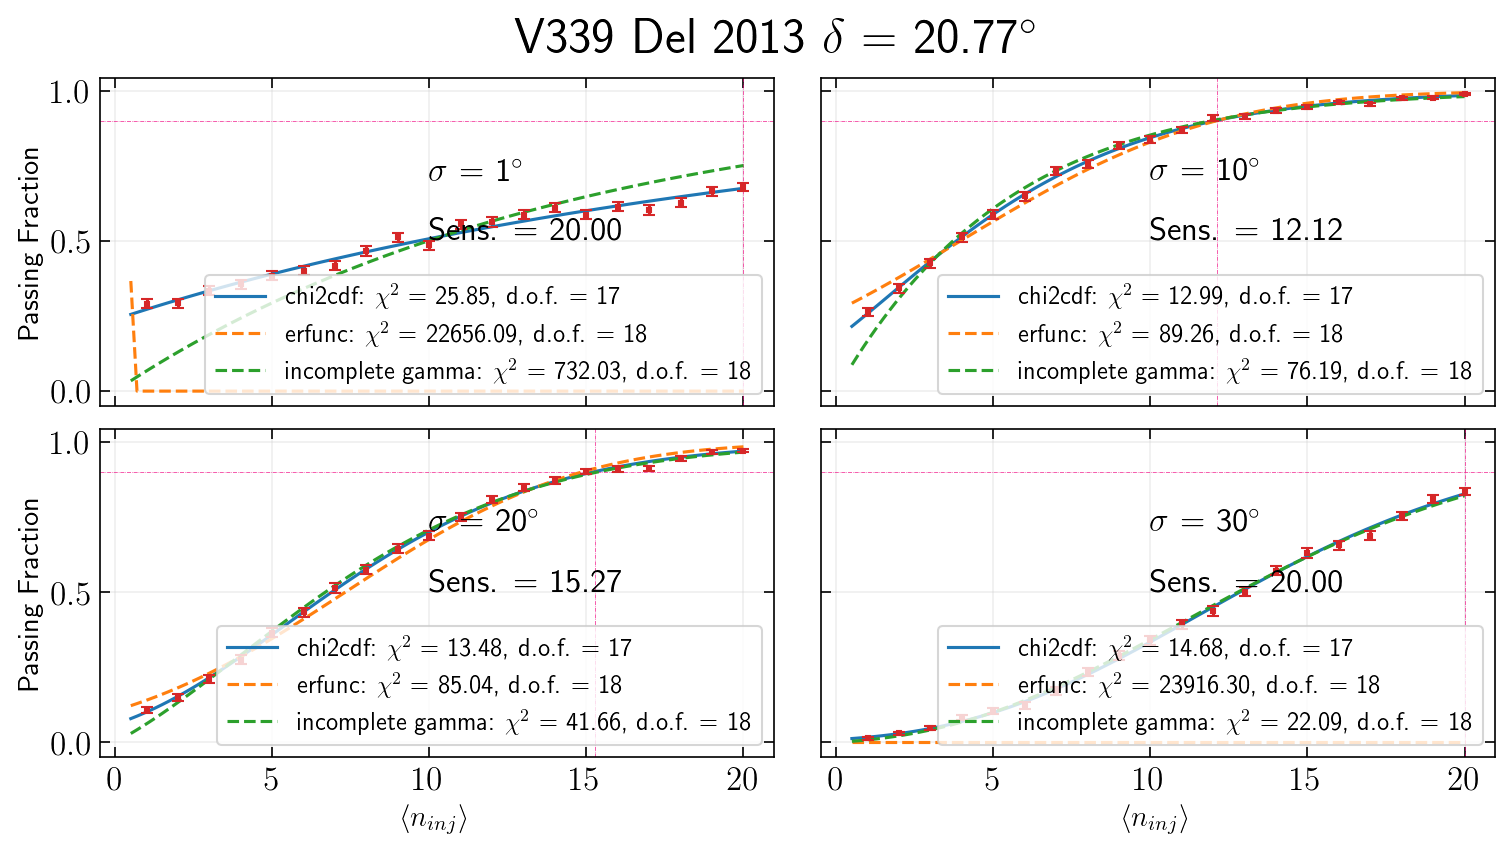

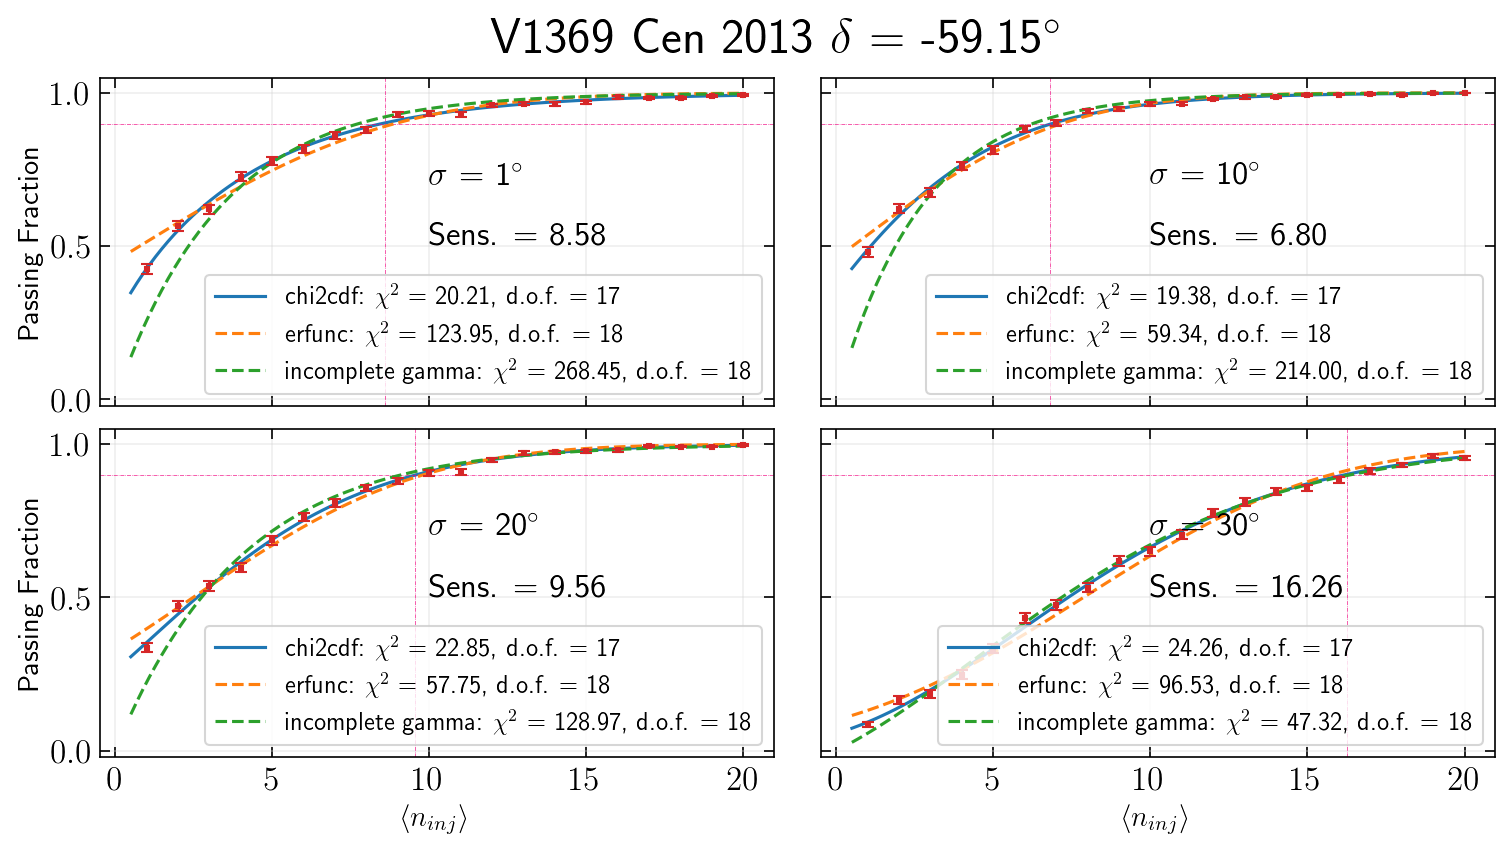

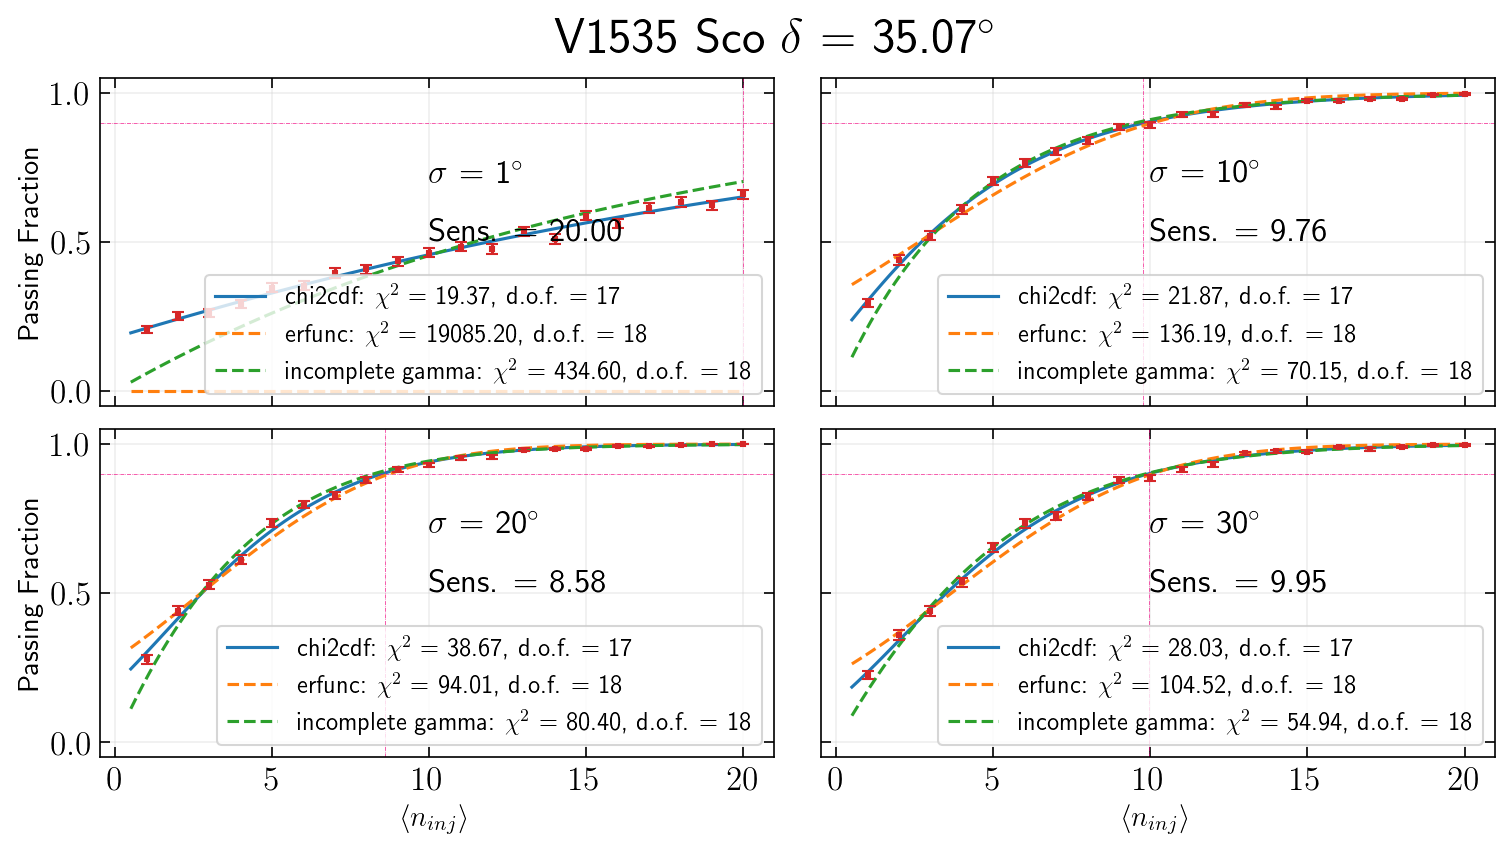

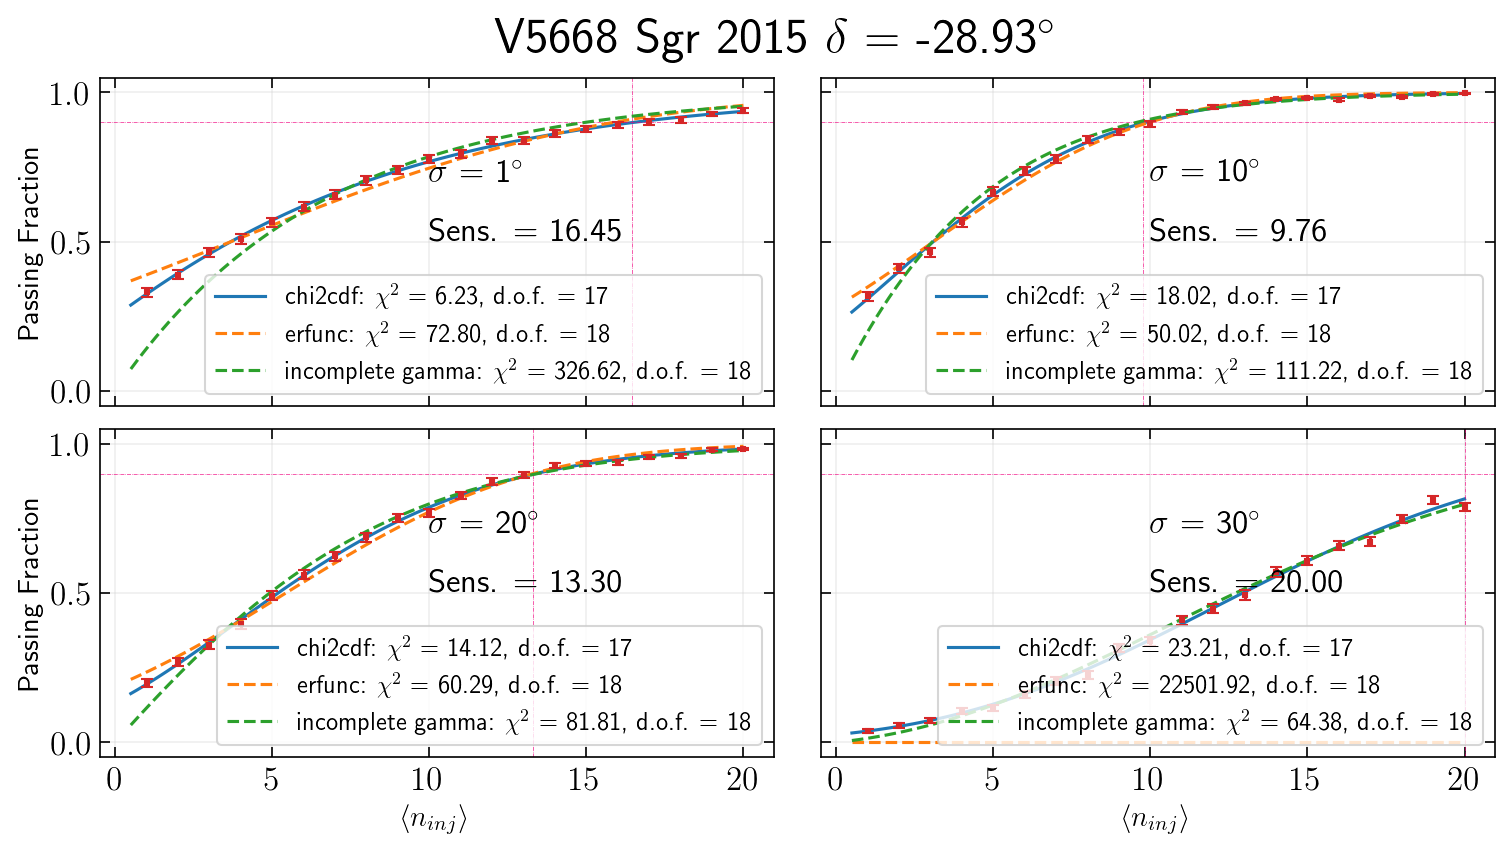

In [16]:
for iii in [1,2,3,4,5,6][:]:
    novnam = df.iloc[iii]['Name']
    novdec = df.iloc[iii]['Dec. (Deg)']
    fig, axs = plt.subplots(figsize=(12,6), nrows=2, ncols=2, sharex=True, sharey=True, dpi = 150)
    fig.subplots_adjust(hspace=0.07)
    fig.subplots_adjust(wspace=0.07)
    fig.suptitle(r'{} '.format(novnam) + r'$\delta$ = {:.2f}'.format(novdec) + r'$^{\circ}$', fontsize = 24, y = 0.95)
    for jj, sigma in enumerate(['1', '10', '20', '30', '45', '90'][:]):
        #fig, ax = plt.subplots(figsize = (6,4), dpi=200)
        try:
            sensitivity_curve(iii, spectra='SPL', sigma=sigma, trim=-1, fontsize = 12, ax = axs[jj/2,jj%2])
            axs[jj/2,jj%2].text(10, 0.7, r' $\sigma$ = {}'.format(sigma) + r'$^{\circ}$')
        except:
            plt.show()
            continue
        if jj/2 == 1:
            axs[jj/2,jj%2].set_xlabel(r'$\langle n_{inj} \rangle$', fontsize = 14)
        if jj%2 == 0:
            axs[jj/2,jj%2].set_ylabel(r'Passing Fraction', fontsize = 14)
        #axs[jj/2,jj%2].set_title(r'{} '.format(novnam) + r'$\delta$ = {:.2f}'.format(novdec) + r'$^{\circ}$,' + r' $\sigma$ = {}'.format(sigma) + r'$^{\circ}$')
    plt.show()